<a href="https://colab.research.google.com/github/nghthompson/Math_Clinic_Project/blob/main/ChainPulse_antepenultimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decentralization of Cryptocurrency Tokens on the Ethereum Blockchain

## Team Members

1. Alex Schaef
> Mathematical Analyst. Took the lead in understanding previous projects and linking various variables to the concept of decentralized finance. Also acted as lead notetaker for meetings both within the group and with sponsors from Chainpulse, and has written a majority of the text blocks in this notebook, including "Introduction," "About the Data," and some graph breakdowns.


2. Nathaniel Hamilton Thompson
> Project Manager. Oversaw management, led in creating the visualization of data, including breaking the data into time segments, and did research to find numerous outside resources to aid in the group’s understanding of the project.


3.   Orin Crouse
> Python Coder. Took the lead in all coding-related aspects of the project. Using the code provided by a previous project, Orin converted it to run successfully with new data to expand on the findings of the previous project and ensured that it continued to run despite new errors that have come with updates to various packages.
> Put in the following sections
>> "General Approach", "Code Starts", "Scatter plot by Months", "Sorting, Defining Core-Periphery Structure", "Form Graph", "Network Dynamics". Repeated for Dydx Token. Also Made, "Citiations".




# Abstract

# Introduction

Cryptocurrency prides itself on being a truly decentralized finance, meaning transactions can happen between any two individuals, or more, without the need of a central intermediary. In our lives, the best example of an intermediary is a bank. With the U.S. dollar, transactions are normally approved by a bank, meaning most exchanges of money go through a central point; the majority of transactions are between a person and a bank. Cryptocurrency is different in that transactions are made entirely between individuals, with no central intermediary. These transactions are recorded on a blockchain, which is essentially a virtual ledger. Our project is inspired by a previous paper written by Ziqiao Ao, Gergely Horvath, and Luyao Zhang, titled *Are Decentralized Finance Really Decentralized? A Social Network Analysis of the AAVE Protocol on the Ethereum Blockchain* The paper studies the AAVE token, and attempts to argue that cryptocurrency is not fully decentralized as it claims to be. In this project, we will expand on the studies done in this original paper, with the following goals:

>a) Confirm or deny the results of the original paper.

>b) Use data from multiple crypto tokens to expand on the results of the original paper.

>c) Examine trends between tokens to see if the decentralization of transactions is comparable across different currencies.

>d) Examine trends across time to see if different tokens follow a similar trend over the lifetime of the token.


In [1]:
#General Approach is in the works

## About the Data
Our data sets consist of five variables.
>There are three “addresses” that consist of a string of numbers and letters that are used to assign a unique moniker to each crypto token and to each account that trades cryptocurrency. They are all *categorical* data, as they are a name/identifier. The actual numbers and letters are not important, as they are only used to differentiate between different tokens and between different traders.

>>**Token_address** is always the same within each data set because there is only one token per data set (in this project, we are using two data sets covering the Euler and dYdX tokens). 

>>**From_address** indicates which account is selling the tokens.

>>**To_address** indicates which account is buying the tokens.

>**Block_timestamp** tells us the time and day of the transaction.

>**Value** shows the number of tokens traded in the transaction (*numerical*).


# Code starts

In [2]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 4.2 MB/s 
     |████████████████████████████████| 965 kB 44.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
%%capture
!pip install cpnet

In [2]:
%%capture
!pip install networkx numpy

In [3]:
import cpnet
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import os
import time
import zipfile
from tqdm import tqdm
import community.community_louvain as community
from numpy import *
import random
import requests
import json 
import datetime
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#**Euler Token**

In [4]:
url = 'https://raw.githubusercontent.com/nghthompson/Math_Clinic_Project/main/Euler%20Crypto%20Data.csv'
edf = pd.read_csv(url)

##Network Visualization

In [5]:
# Number Wallet IDs for simplification

unique_addresses = set(edf['from_address'].unique()) | set(edf['to_address'].unique())
mapping = {address: n for n, address in enumerate(unique_addresses)}

edf[['from_ID', 'to_ID']] = edf[['from_address', 'to_address']].replace(mapping)

In [6]:
# edit timestamp to sort by days

edf.rename(columns={'f0_':'value'}, inplace = True)
edf = edf.dropna()
edf['value'] = edf['value'].apply(lambda x: float(x))
edf['timestamp'] = pd.to_datetime(edf['block_timestamp'])
edf['timestamp'] = edf['timestamp'].apply(lambda x: str(x)[:10])
edf['timestamp'] = pd.to_datetime(edf['timestamp'])

In [7]:
# breakdown dataframe into weeks and months

all_time = edf
june = edf[(edf.timestamp >= '2022-06-01') & (edf.timestamp <= '2022-06-30')]
july = edf[(edf.timestamp >= '2022-07-01') & (edf.timestamp <= '2022-07-31')]
august = edf[(edf.timestamp >= '2022-08-01') & (edf.timestamp <= '2022-08-31')]
week1 = edf[(edf.timestamp >= '2022-06-19') & (edf.timestamp <= '2022-06-25')]
week2 = edf[(edf.timestamp >= '2022-06-26') & (edf.timestamp <= '2022-07-02')]
week3 = edf[(edf.timestamp >= '2022-07-03') & (edf.timestamp <= '2022-07-09')]
week4 = edf[(edf.timestamp >= '2022-07-10') & (edf.timestamp <= '2022-07-16')]
week5 = edf[(edf.timestamp >= '2022-07-17') & (edf.timestamp <= '2022-07-23')]
week6 = edf[(edf.timestamp >= '2022-07-24') & (edf.timestamp <= '2022-07-30')]
week7 = edf[(edf.timestamp >= '2022-07-31') & (edf.timestamp <= '2022-08-06')]
week8 = edf[(edf.timestamp >= '2022-08-07') & (edf.timestamp <= '2022-08-13')]
week9 = edf[(edf.timestamp >= '2022-08-14') & (edf.timestamp <= '2022-08-20')]
week10 = edf[(edf.timestamp >= '2022-08-21') & (edf.timestamp <= '2022-08-27')]

In [8]:
all_time_g = nx.from_pandas_edgelist(edf, source='from_ID', target='to_ID', edge_attr='value')
june_g = nx.from_pandas_edgelist(june, source='from_ID', target='to_ID', edge_attr='value')
july_g = nx.from_pandas_edgelist(july, source='from_ID', target='to_ID', edge_attr='value')
august_g = nx.from_pandas_edgelist(august, source='from_ID', target='to_ID', edge_attr='value')
week1_g = nx.from_pandas_edgelist(week1, source='from_ID', target='to_ID', edge_attr='value')
week2_g = nx.from_pandas_edgelist(week2, source='from_ID', target='to_ID', edge_attr='value')
week3_g = nx.from_pandas_edgelist(week3, source='from_ID', target='to_ID', edge_attr='value')
week4_g = nx.from_pandas_edgelist(week4, source='from_ID', target='to_ID', edge_attr='value')
week5_g = nx.from_pandas_edgelist(week5, source='from_ID', target='to_ID', edge_attr='value')
week6_g = nx.from_pandas_edgelist(week6, source='from_ID', target='to_ID', edge_attr='value')
week7_g = nx.from_pandas_edgelist(week7, source='from_ID', target='to_ID', edge_attr='value')
week8_g = nx.from_pandas_edgelist(week8, source='from_ID', target='to_ID', edge_attr='value')
week9_g = nx.from_pandas_edgelist(week9, source='from_ID', target='to_ID', edge_attr='value')
week10_g = nx.from_pandas_edgelist(week10, source='from_ID', target='to_ID', edge_attr='value')

In [9]:
july.head()

,token_address,from_address,to_address,block_timestamp,value,from_ID,to_ID,timestamp
5486,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0x7ff76fed0a44ca152580afa2d00d333a67fb117d,0x071ee78e0e01bb86e39d9e9e432a30975a896849,2022-07-01 00:08:41.000,5.000000e+20,3564,3704,2022-07-01
5487,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0xe93381fb4c4f14bda253907b18fad305d799241a,0x81153f0889ab398c4acb42cb58b565a5392bba95,2022-07-01 00:15:54.000,2.697251e+20,3134,2464,2022-07-01
5488,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0x81153f0889ab398c4acb42cb58b565a5392bba95,0xb003df4b243f938132e8cadbeb237abc5a889fb4,2022-07-01 00:15:54.000,2.697251e+20,2464,159,2022-07-01
5489,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0xd524e29e3baf5bb085403ca5665301e94387a7e2,0x3645dff2e8ff9fb6075632ecf3a0097c16943f41,2022-07-01 00:21:24.000,2.534413e+19,2263,2204,2022-07-01
5490,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0x7ff76fed0a44ca152580afa2d00d333a67fb117d,0x2057cfb9fd11837d61b294d514c5bd03e5e7189a,2022-07-01 00:30:50.000,5.000000e+20,3564,852,2022-07-01


The next cell takes about 1.5 minutes to run.

11372 transactions


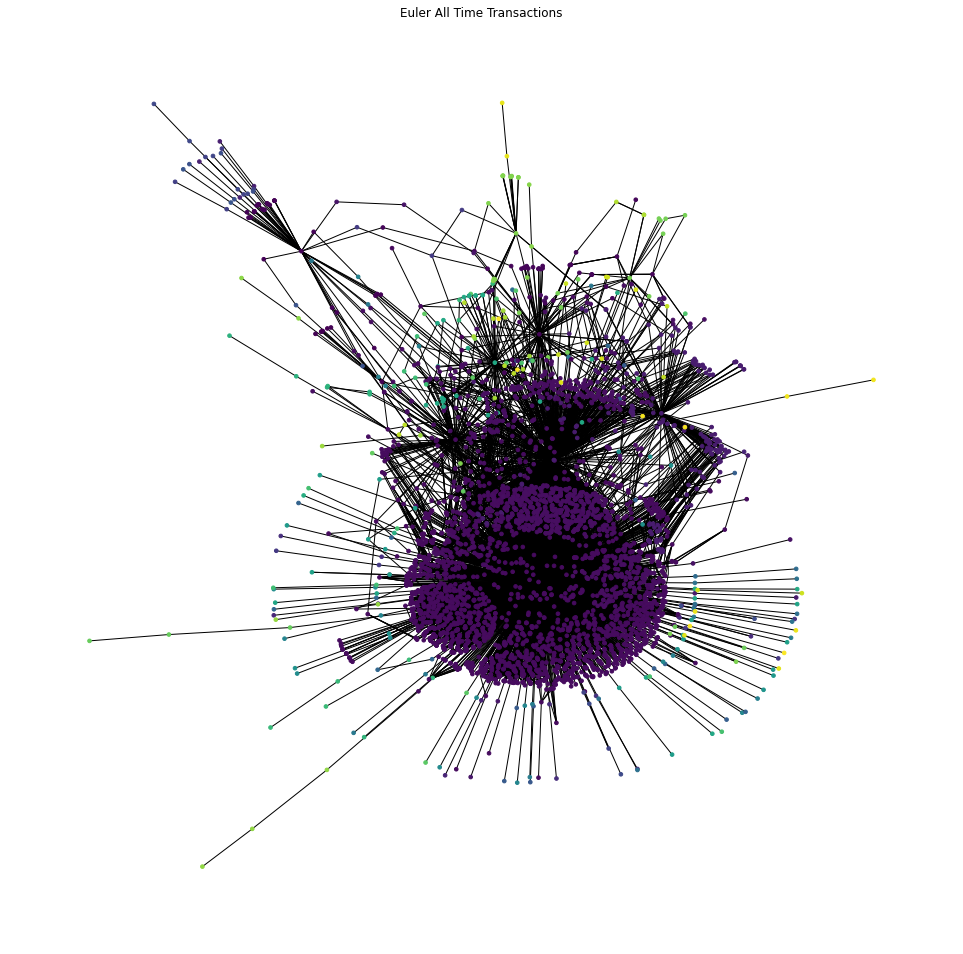

In [10]:
# network of all transactions

all_comm = nx.community.label_propagation_communities(all_time_g)
community_index = {n: i for i, com in enumerate(all_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler All Time Transactions'.format(len(all_time.index)))
all_color = [community_index[n] for n in all_time_g]
print(len(all_time.index), 'transactions')
nx.draw(all_time_g, with_labels=False, node_size=13, node_color=all_color)

### Network of June Transactions

5485 transactions


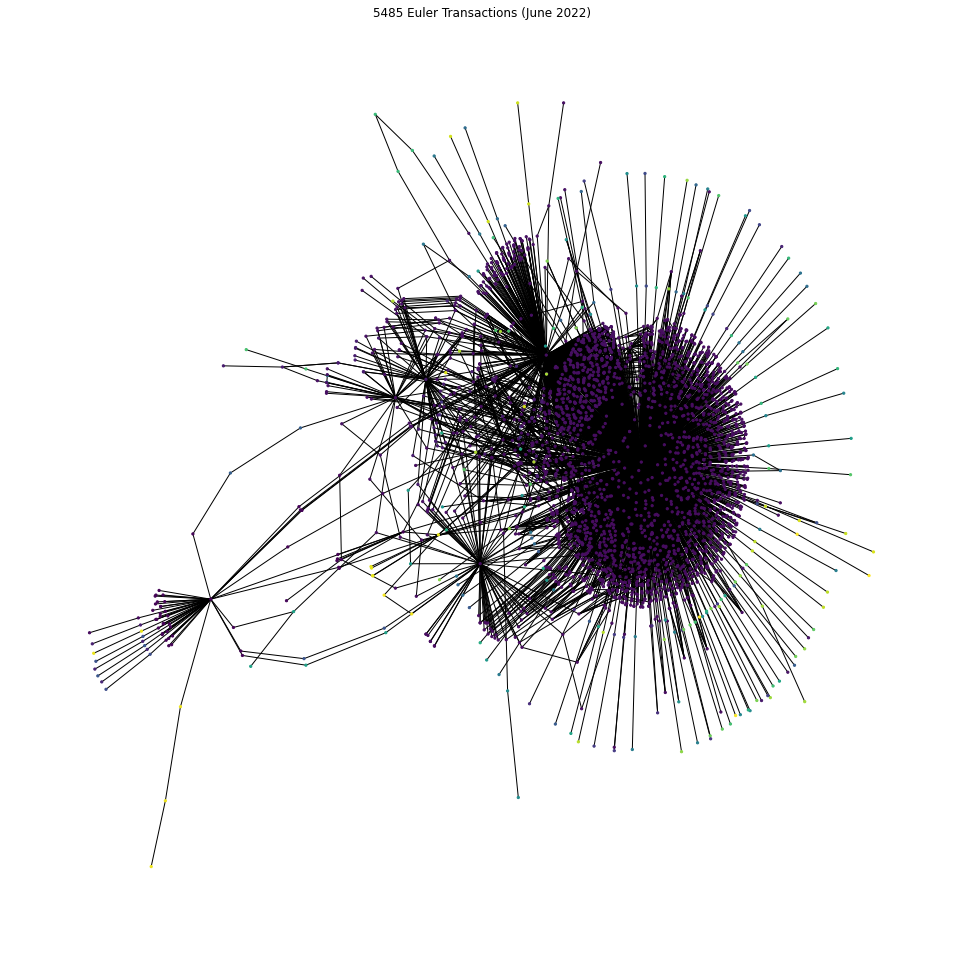

In [11]:
# network of June transactions

june_comm = nx.community.label_propagation_communities(june_g)
community_index = {n: i for i, com in enumerate(june_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('{:} Euler Transactions (June 2022)'.format(len(june.index)))
june_color = [community_index[n] for n in june_g]
print(len(june.index), 'transactions')
nx.draw(june_g, with_labels=False, node_size=5, node_color=june_color)

#### Scatter plot of June by days

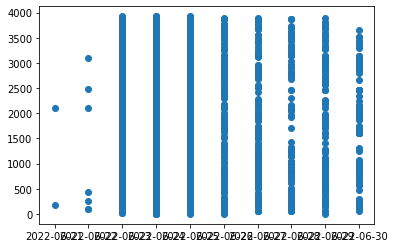

In [12]:
plt.scatter(june['timestamp'], june['to_ID'])
plt.show()

#### Scatter plot of June by Seller

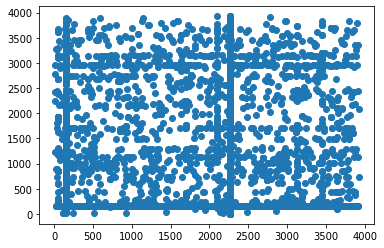

In [13]:
plt.scatter(june['from_ID'], june['to_ID'])
plt.show()

### Network of July Transactions

3396 transactions


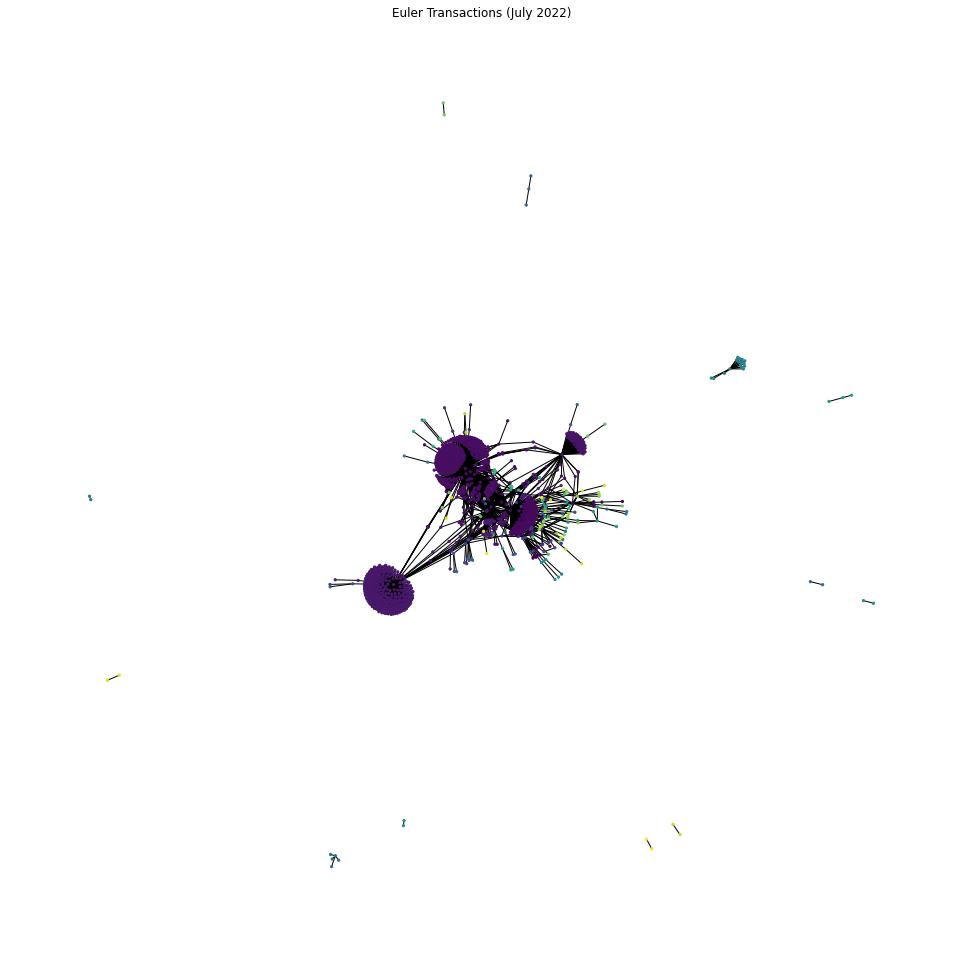

In [14]:
# network of July transactions

july_comm = nx.community.label_propagation_communities(july_g)
community_index = {n: i for i, com in enumerate(july_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (July 2022)'.format(len(july.index)))
july_color = [community_index[n] for n in july_g]
print(len(july.index), 'transactions')
nx.draw(july_g, with_labels=False, node_size=5, node_color=july_color)

#### Scatter plot of July by days

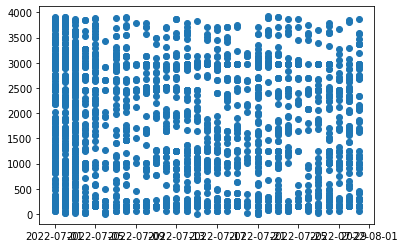

In [15]:
plt.scatter(july['timestamp'], july['to_ID'])
plt.show()

#### Scatter plot of July by Seller

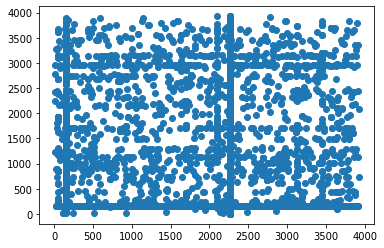

In [16]:
plt.scatter(june['from_ID'], june['to_ID'])
plt.show()

### Network of August Transactions

2490 transactions


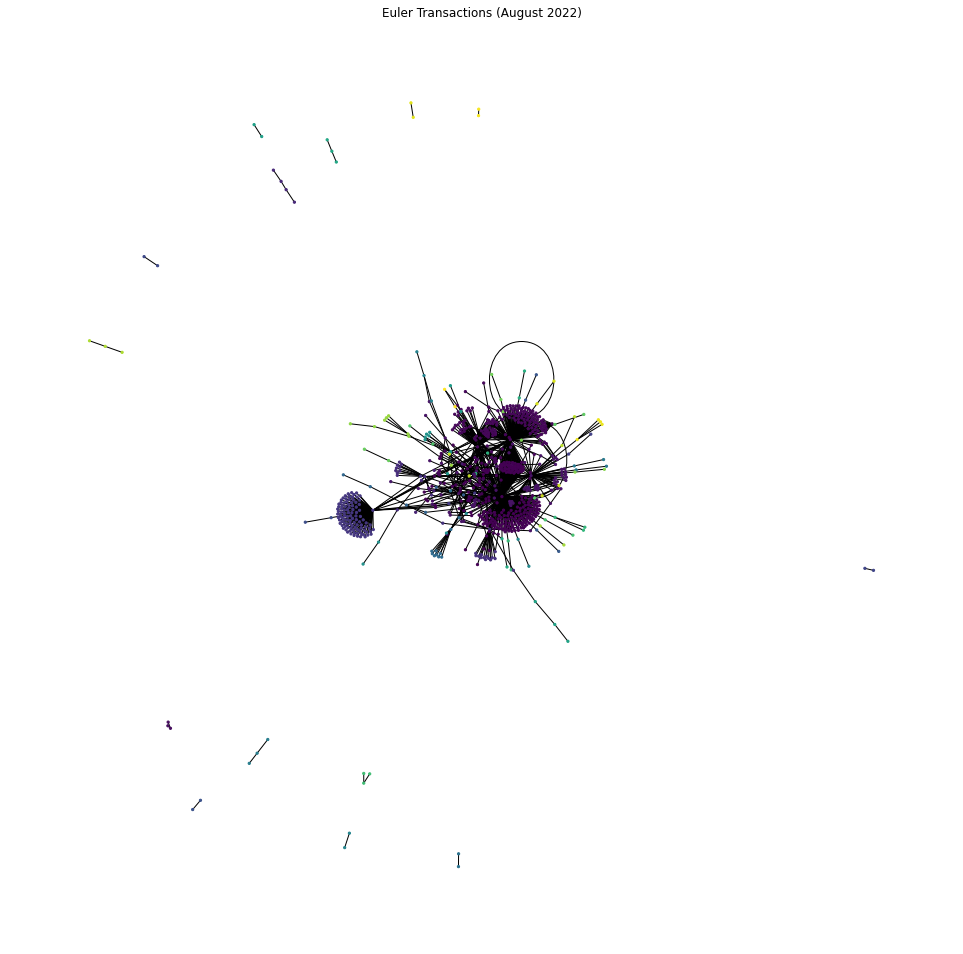

In [17]:
# network of August transactions

august_comm = nx.community.label_propagation_communities(august_g)
community_index = {n: i for i, com in enumerate(august_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (August 2022)'.format(len(august.index)))
august_color = [community_index[n] for n in august_g]
print(len(august.index), 'transactions')
nx.draw(august_g, with_labels=False, node_size=5, node_color=august_color)

#### Scatter plot of August by days

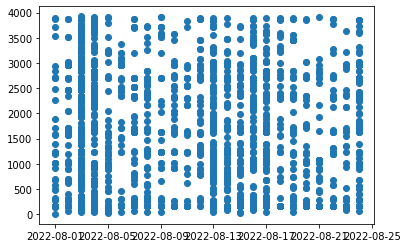

In [18]:
plt.scatter(august['timestamp'], august['to_ID'])
plt.show()

#### Scatter plot of August by Seller

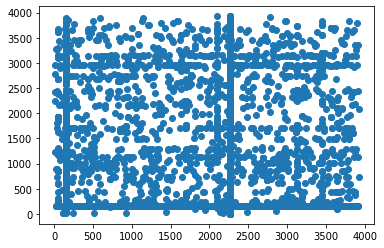

In [19]:
plt.scatter(june['from_ID'], june['to_ID'])
plt.show()

4562 transactions


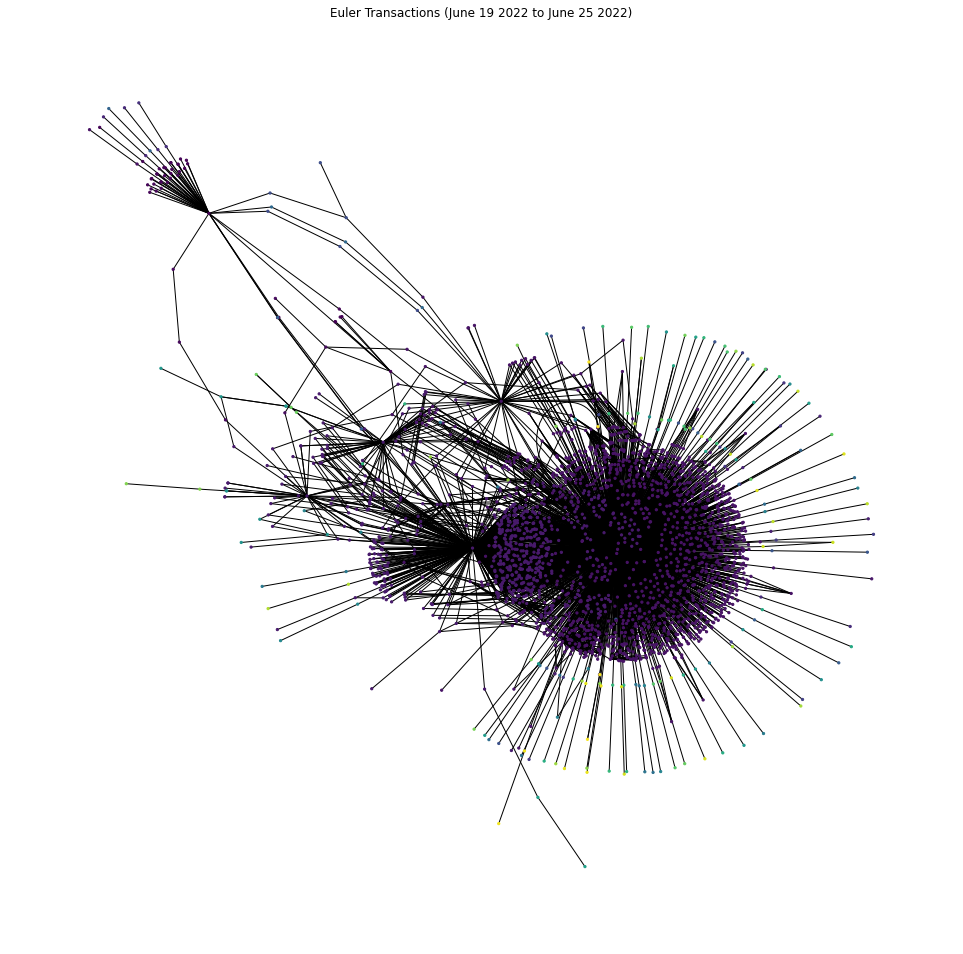

In [20]:
# network of June 19 - 25 transactions

week1_comm = nx.community.label_propagation_communities(week1_g)
community_index = {n: i for i, com in enumerate(week1_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (June 19 2022 to June 25 2022)'.format(len(week1.index)))
week1_color = [community_index[n] for n in week1_g]
print(len(week1.index), 'transactions')
nx.draw(week1_g, with_labels=False, node_size=5, node_color=week1_color)

1422 transactions


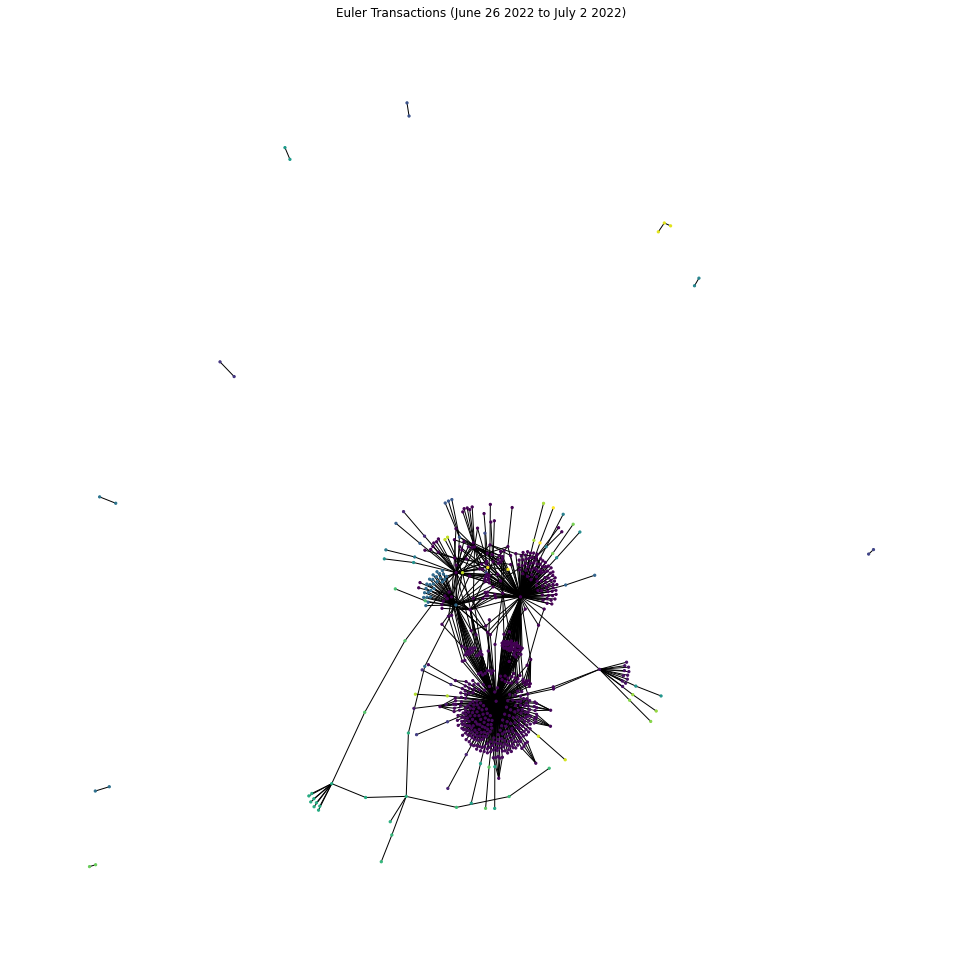

In [21]:
# network of June 26 - July 2 transactions

week2_comm = nx.community.label_propagation_communities(week2_g)
community_index = {n: i for i, com in enumerate(week2_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (June 26 2022 to July 2 2022)'.format(len(week2.index)))
week2_color = [community_index[n] for n in week2_g]
print(len(week2.index), 'transactions')
nx.draw(week2_g, with_labels=False, node_size=5, node_color=week2_color)

766 transactions


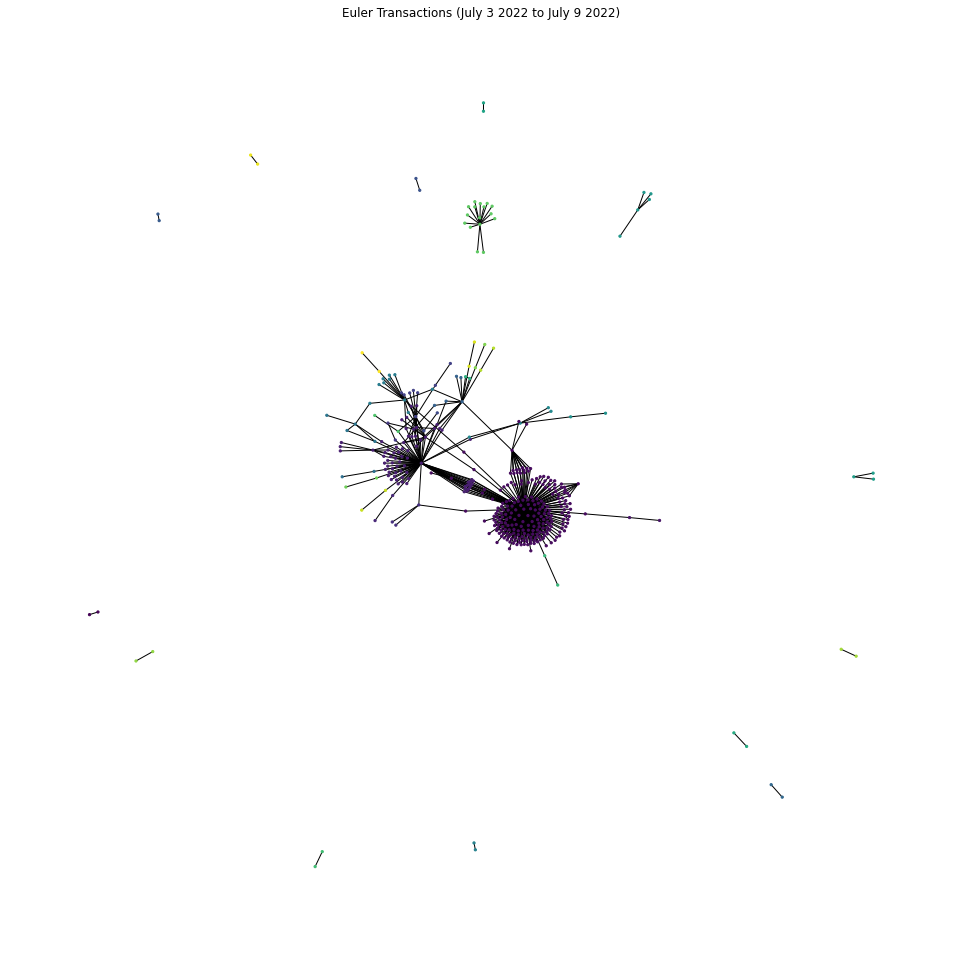

In [22]:
# network of July 3 - July 9 transactions

week3_comm = nx.community.label_propagation_communities(week3_g)
community_index = {n: i for i, com in enumerate(week3_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (July 3 2022 to July 9 2022)'.format(len(week3.index)))
week3_color = [community_index[n] for n in week3_g]
print(len(week3.index), 'transactions')
nx.draw(week3_g, with_labels=False, node_size=5, node_color=week3_color)

596 transactions


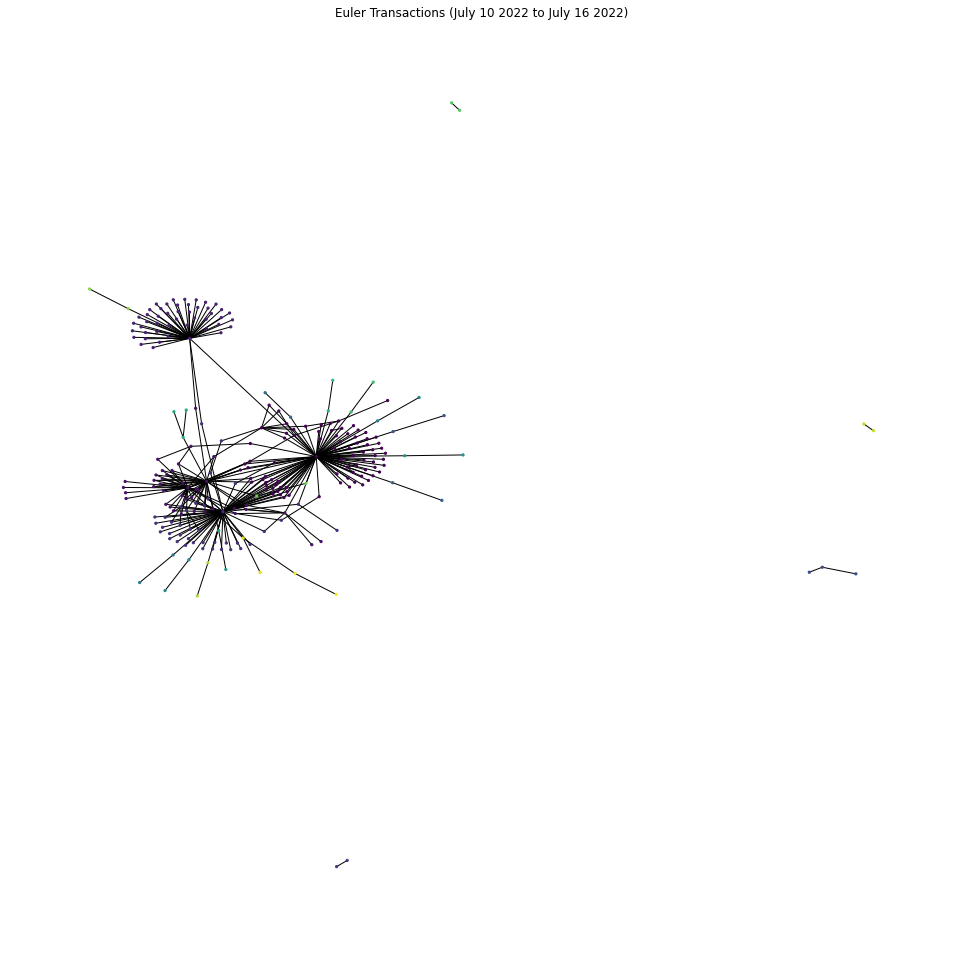

In [23]:
# network of July 10 - July 16 transactions

week4_comm = nx.community.label_propagation_communities(week4_g)
community_index = {n: i for i, com in enumerate(week4_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (July 10 2022 to July 16 2022)'.format(len(week4.index)))
week4_color = [community_index[n] for n in week4_g]
print(len(week4.index), 'transactions')
nx.draw(week4_g, with_labels=False, node_size=5, node_color=week4_color)

787 transactions


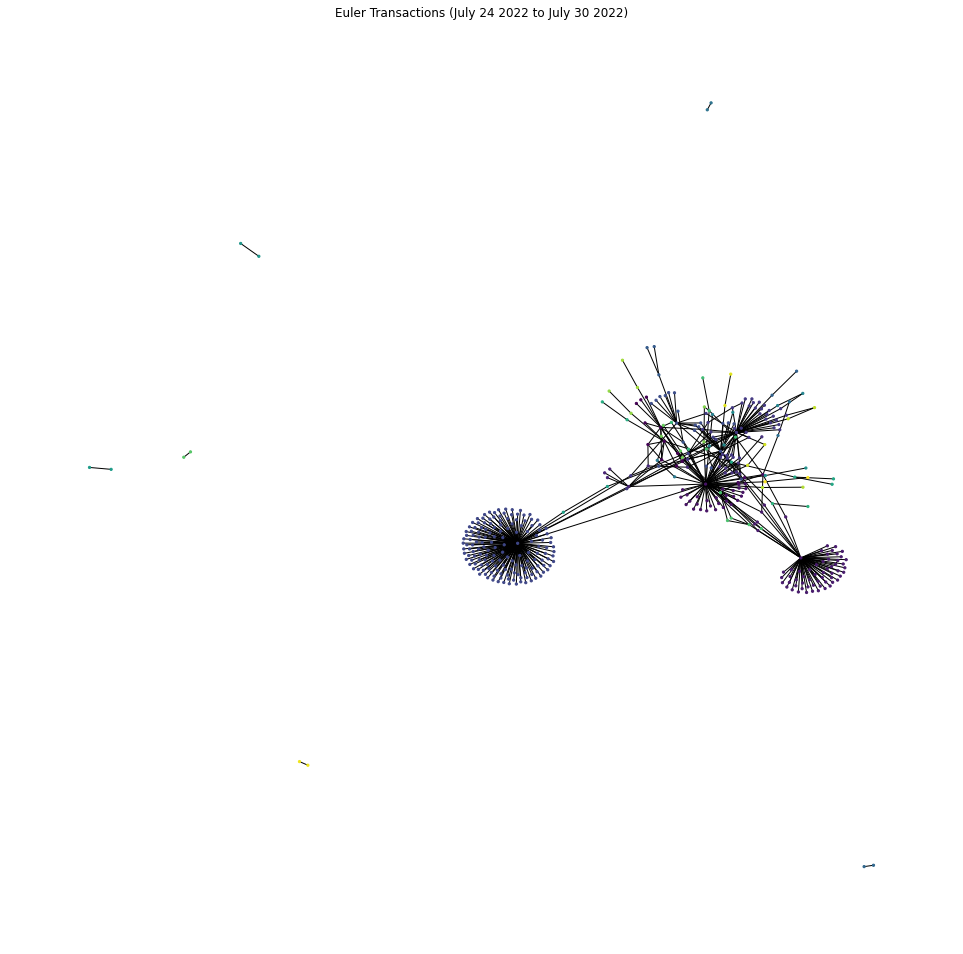

In [24]:
# network of July 24 - July 30 transactions

week5_comm = nx.community.label_propagation_communities(week5_g)
community_index = {n: i for i, com in enumerate(week5_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (July 24 2022 to July 30 2022)'.format(len(week5.index)))
week5_color = [community_index[n] for n in week5_g]
print(len(week5.index), 'transactions')
nx.draw(week5_g, with_labels=False, node_size=5, node_color=week5_color)

662 transactions


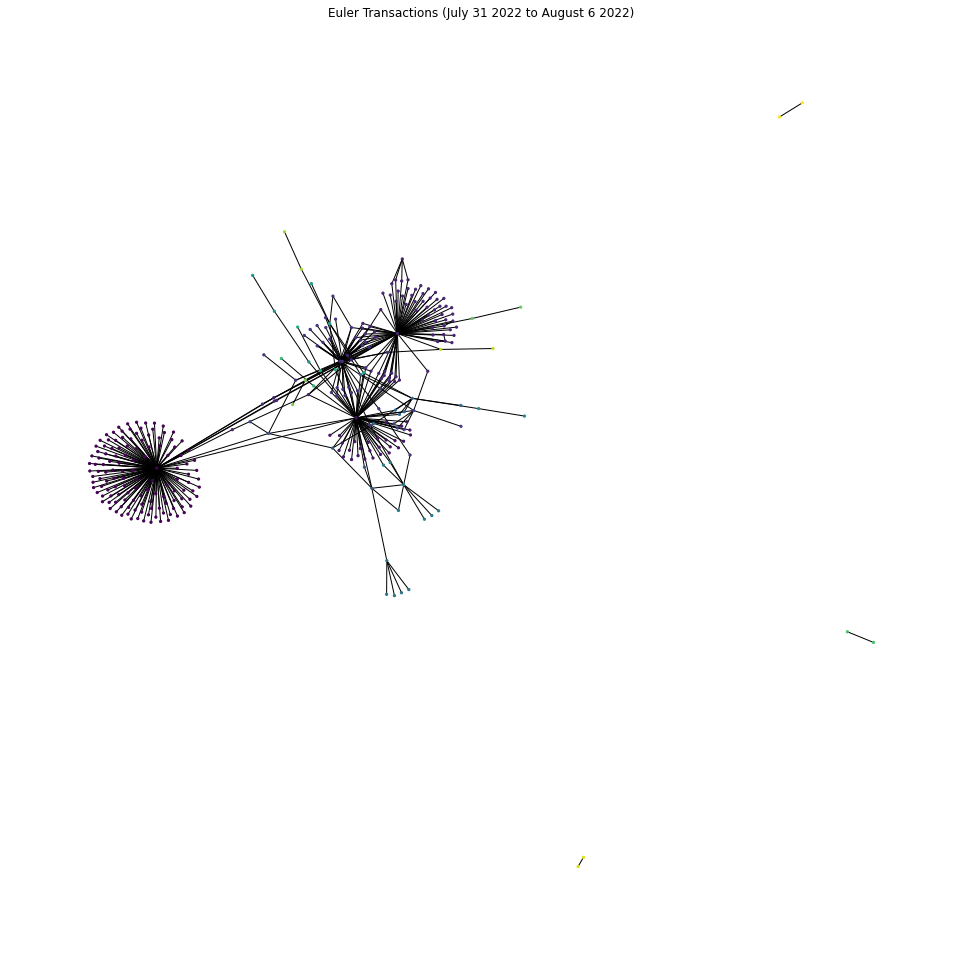

In [25]:
# network of July 31 - August 6 transactions

week6_comm = nx.community.label_propagation_communities(week6_g)
community_index = {n: i for i, com in enumerate(week6_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (July 31 2022 to August 6 2022)'.format(len(week6.index)))
week6_color = [community_index[n] for n in week6_g]
print(len(week6.index), 'transactions')
nx.draw(week6_g, with_labels=False, node_size=5, node_color=week6_color)

1040 transactions


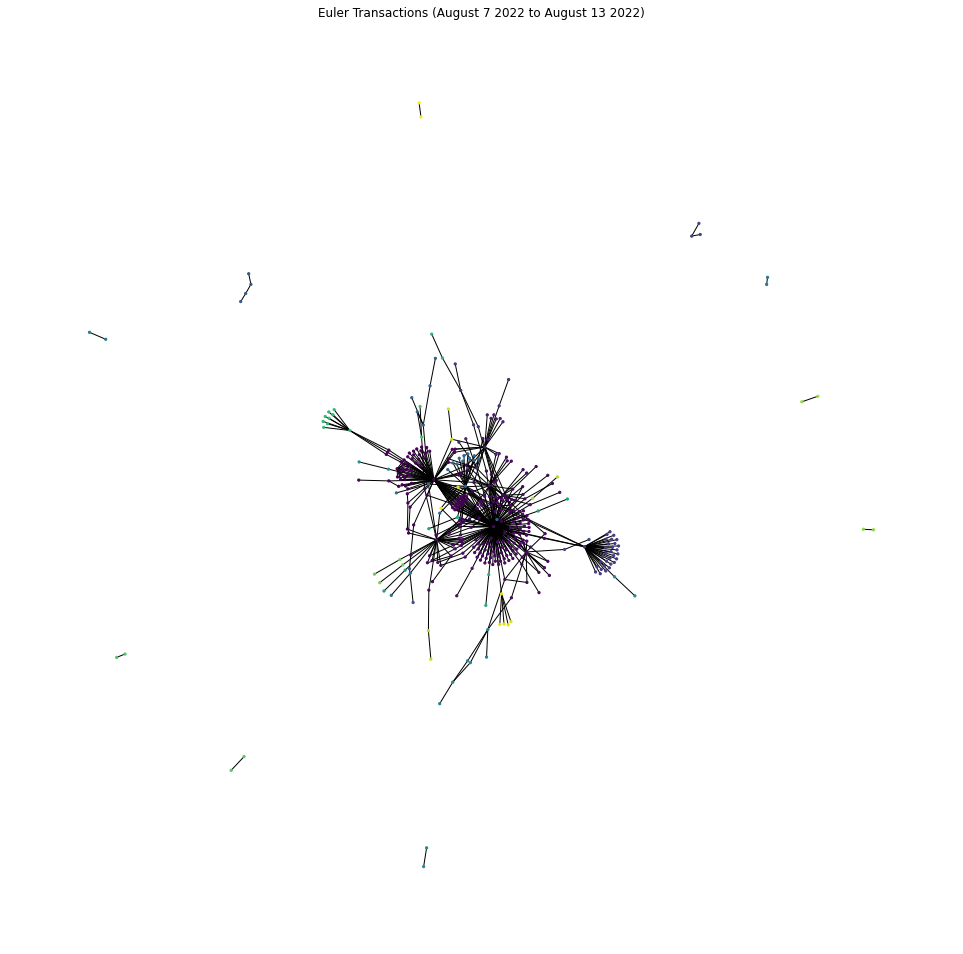

In [26]:
# network of August 7 - August 13 transactions

week7_comm = nx.community.label_propagation_communities(week7_g)
community_index = {n: i for i, com in enumerate(week7_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (August 7 2022 to August 13 2022)'.format(len(week7.index)))
week7_color = [community_index[n] for n in week7_g]
print(len(week7.index), 'transactions')
nx.draw(week7_g, with_labels=False, node_size=5, node_color=week7_color)

545 transactions


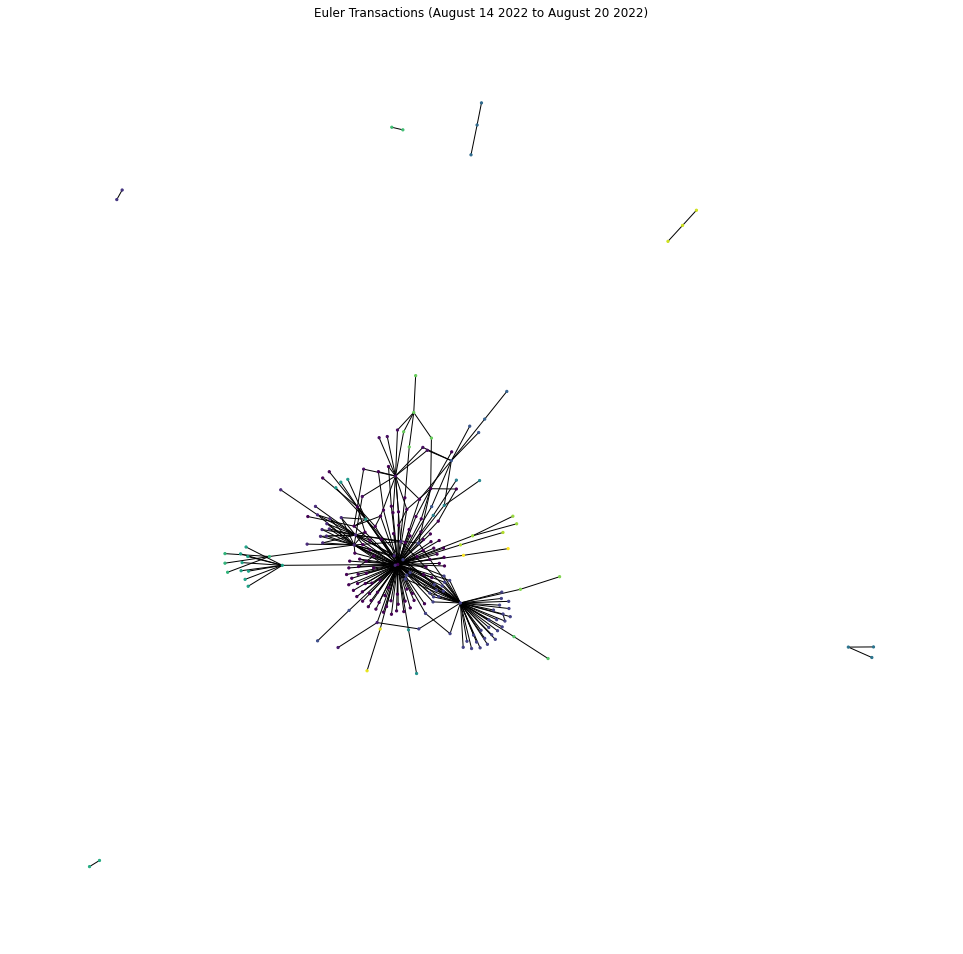

In [27]:
# network of August 14 - August 20 transactions

week8_comm = nx.community.label_propagation_communities(week8_g)
community_index = {n: i for i, com in enumerate(week8_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (August 14 2022 to August 20 2022)'.format(len(week8.index)))
week8_color = [community_index[n] for n in week8_g]
print(len(week8.index), 'transactions')
nx.draw(week8_g, with_labels=False, node_size=5, node_color=week8_color)

649 transactions


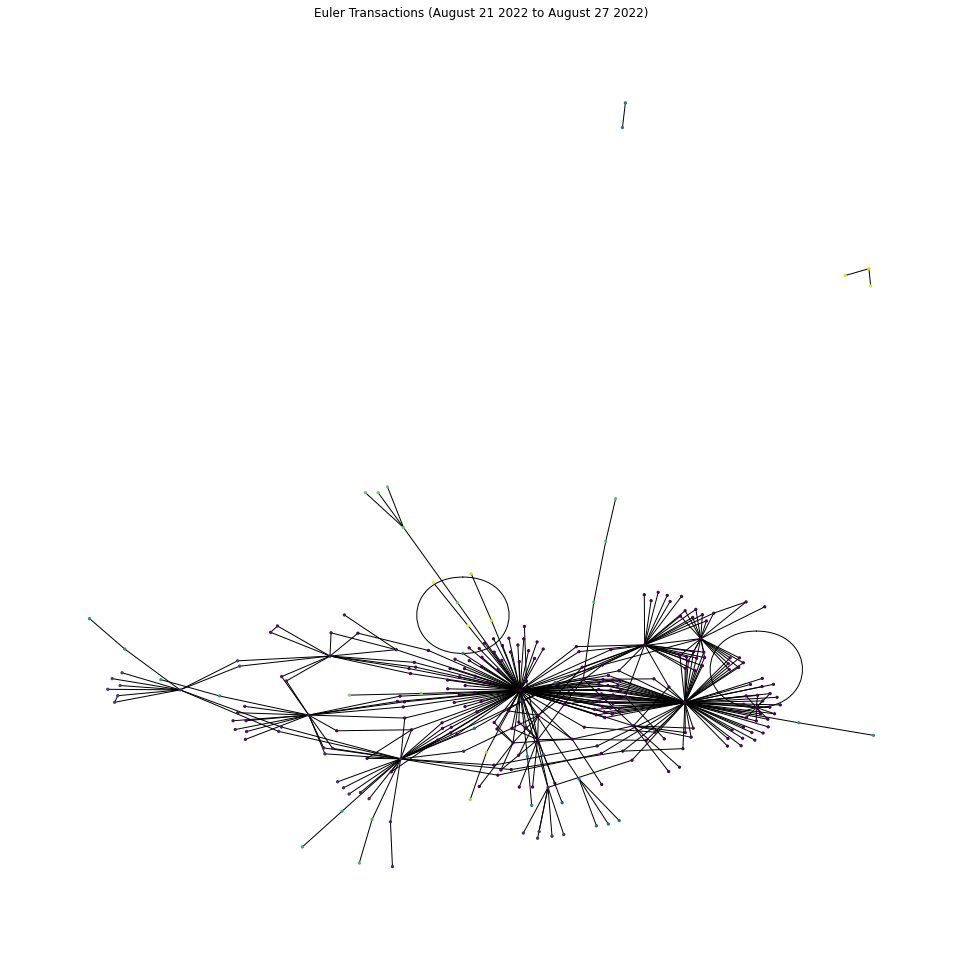

In [28]:
# network of August 21 - August 27 transactions

week9_comm = nx.community.label_propagation_communities(week9_g)
community_index = {n: i for i, com in enumerate(week9_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (August 21 2022 to August 27 2022)'.format(len(week9.index)))
week9_color = [community_index[n] for n in week9_g]
print(len(week9.index), 'transactions')
nx.draw(week9_g, with_labels=False, node_size=5, node_color=week9_color)

342 transactions


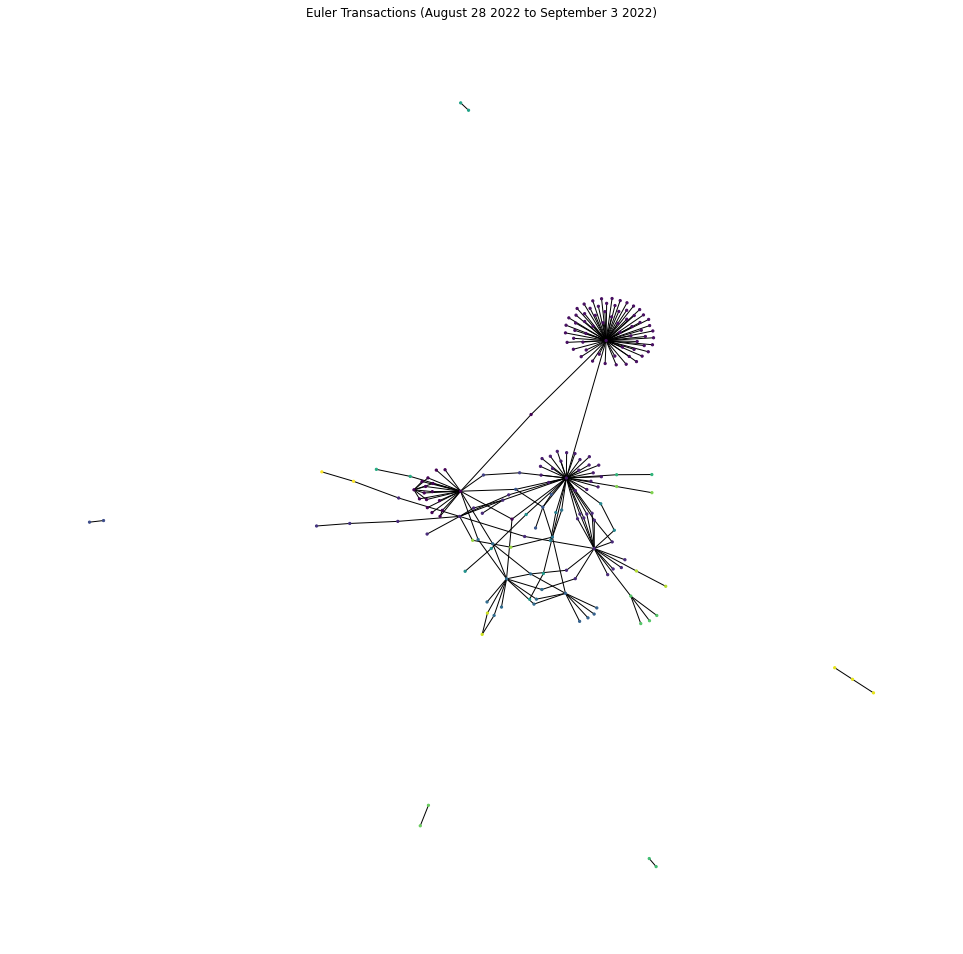

In [29]:
# network of August 28 - September 3 transactions

week10_comm = nx.community.label_propagation_communities(week10_g)
community_index = {n: i for i, com in enumerate(week10_comm) for n in com}

plt.figure(figsize=(17, 17))
plt.title('Euler Transactions (August 28 2022 to September 3 2022)'.format(len(week10.index)))
week10_color = [community_index[n] for n in week10_g]
print(len(week10.index), 'transactions')
nx.draw(week10_g, with_labels=False, node_size=5, node_color=week10_color)

##Sorting, Defining Core-Periphery Structure

In [30]:
edf.sort_values('block_timestamp', ascending = True)
edf.tail()

,token_address,from_address,to_address,block_timestamp,value,from_ID,to_ID,timestamp
11367,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0x30741289523c2e4d2a62c7d6722686d14e723851,0x3bddcec392e54b303a42194fd57846d8df99b93e,2022-08-24 22:25:07.000,2.488677e+20,2705,2128,2022-08-24
11368,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0xb003df4b243f938132e8cadbeb237abc5a889fb4,0x04352997a32e4fe761ee0ecfc1df50e485f2e78b,2022-08-24 22:46:59.000,4.050734e+19,159,3012,2022-08-24
11369,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0x30741289523c2e4d2a62c7d6722686d14e723851,0x61964babc2063480db1a606d5140185eb742e78e,2022-08-24 22:47:38.000,3.795860e+20,2705,1747,2022-08-24
11370,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0x61964babc2063480db1a606d5140185eb742e78e,0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88,2022-08-24 22:50:47.000,3.795860e+20,1747,1703,2022-08-24
11371,0xd9fcd98c322942075a5c3860693e9f4f03aae07b,0x30741289523c2e4d2a62c7d6722686d14e723851,0xd0be1fded5d964619b92b3672c08c43305529be0,2022-08-24 22:52:15.000,1.373549e+20,2705,2243,2022-08-24


In [31]:
# data cleaning

edf = edf[edf['timestamp']>='2021-12-30']
edf = edf[edf['timestamp']<='2022-08-24']


In [32]:
edf.to_csv('Euler Raw Transfer Data.csv')

In [33]:
edf = edf.drop(columns = ['token_address','block_timestamp'])

In [34]:
## add values between the 2 same addresses together
edf[['from_address', 'to_address']] = np.sort(edf[['from_address', 'to_address']], axis=1)
edf= edf.groupby(['timestamp','from_address','to_address']).agg(lambda x: sum(x)).reset_index()
#edf

In [35]:
edf.to_csv('Euler transaction data_after preprocessing.csv')

In [36]:
edf = pd.read_csv('Euler transaction data_after preprocessing.csv')

### Network Analysis

In [37]:
edf_time_partition= edf.groupby(['timestamp'])['to_address'].agg(['nunique']).reset_index()
edf_time_partition = edf_time_partition.drop(['nunique'], axis=1)

###Number of daily edges

In [38]:
num_nodes = []
num_edges = []
for i in range(0,len(edf_time_partition)):
    
    # Data Partition
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Number of nodes, number of edges
    nodes = G.number_of_nodes()
    edges = G.number_of_edges()
    num_nodes.append(nodes)
    num_edges.append(edges)

In [39]:
Network_Features={"num_nodes" : num_nodes,"num_edges" : num_edges}
Network_Features=pd.DataFrame(Network_Features)
Network_Features['time'] =  edf_time_partition['timestamp']

These code cells above build the nodes and edges that will be used for the visualization of the core-periphery structure.

### Degree Setting

In [40]:
Degreemean = []
Degreestd = []
for i in range(0,len(edf_time_partition)):
    
    # Data Partition
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    #edf_1 = actsenrec.loc[actsenrec['timestamp']==edf_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Degree_centrality, mean_value
    degrees = G.degree()
    degree = list(dict(G.degree()).values())
    edf_deg = {"Degree" : degree}
    edf_deg = pd.DataFrame(edf_deg)
    DC_mean = edf_deg['Degree'].mean()
    DC_std = edf_deg['Degree'].std()
    Degreemean.append(DC_mean)
    Degreestd.append(DC_std)

In [41]:
Network_Features['Degree mean']  = Degreemean
Network_Features['Degree std']  = Degreestd

These code cells above calculate the degree of centrality, meaning how strong is the difference between the core-periphery pairs.

### Extract Top 10 by ratio

In [42]:
top10Degreemean = []
top10Degreestd = []

for i in range(0,len(edf_time_partition)):

    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    sender_mdegree= edf_1.groupby(['from_address'])['to_address'].count().reset_index()
    receiver_mdegree = edf_1.groupby(['to_address'])['from_address'].count().reset_index()
    sender_mdegree = sender_mdegree.rename(columns={'to_address':'degree'})
    sender_mdegree = sender_mdegree.rename(columns={'from_address':'address'})
    receiver_mdegree = receiver_mdegree.rename(columns = {'from_address':'degree'})
    receiver_mdegree = receiver_mdegree.rename(columns = {'to_address':'address'})

    merge = pd.merge(sender_mdegree,receiver_mdegree,on="address",how = "outer")
    merge = merge.fillna(int(0))
    merge['degree'] = merge['degree_x']+merge['degree_y']

    merge.sort_values(by=['degree'], ascending=False, inplace=True)
    merge = merge.reset_index()
    top5degree = merge['address'][0:10].tolist()

    sen_top =  edf_1[edf_1['from_address'].isin(top5degree)]
    rec_top= edf_1[edf_1['to_address'].isin(top5degree)]

    topaddress = pd.concat([sen_top,rec_top]).drop_duplicates()

    G = nx.from_pandas_edgelist(topaddress, 'from_address', 'to_address', 'value', nx.Graph())
    # Calculation of absolute degree
    degree = []
    for j in range (0,2): ## MUST CHANGE BACK TO (0,10) LATER. FIND OUT WHY top5degree IS ONLY THREE VARIABLES
        degrees = G.degree(top5degree[j])
        degree.append(degrees)
    edf_deg = {"Degree" : degree}
    edf_deg = pd.DataFrame(edf_deg)
    deg_mean = edf_deg['Degree'].mean()
    deg_std = edf_deg['Degree'].std()
    top10Degreemean.append(deg_mean)
    top10Degreestd.append(deg_std)

In [43]:
Network_Features['Top10Degree mean']  = top10Degreemean
Network_Features['Top10Degree std']  = top10Degreestd

In [44]:
Network_Features['Top10 Degree mean ratio']  = Network_Features['Top10Degree mean']/Network_Features['Degree mean']

The above code cells don't show much being there aren't 10 degrees found, but rather only two. That means there are only two core nodes that reach the criteria to be considered core. Already we see the Euler token to be more decentralized rather than central.

### Degree centrality

In [45]:
DCmean = []
DCstd = []
for i in range(0,len(edf_time_partition)):
    
    # Data Partition
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    #edf_1 = actsenrec.loc[actsenrec['timestamp']==edf_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Degree_centrality, mean_value
    deg_cen = nx.degree_centrality(G)
    edf_deg = pd.DataFrame.from_dict(deg_cen, orient='index', columns=['Degree_Centrality'])
    DC_mean = edf_deg['Degree_Centrality'].mean()
    DC_std = edf_deg['Degree_Centrality'].std()
    DCmean.append(DC_mean)
    DCstd.append(DC_std)

THe above code cell redefines the core nodes found to double check and ensure the understanding of core is reached for the entire network.

### Coefficient Clusters

In [46]:
clustermean = []
clusterstd = []
for i in range(0,len(edf_time_partition)):
    
    # Data Partition
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    #edf_1 = actsenrec.loc[actsenrec['timestamp']==edf_time_partition['timestamp'][i]]
    
    # Unweighted-Directed Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Clustering_Coefficient, mean_value, std
    clustering = nx.clustering(G)
    df_cluster = pd.DataFrame.from_dict(clustering, orient='index', columns=['Clustering_Coefficient'])
    cluster_mean = df_cluster['Clustering_Coefficient'].mean()
    cluster_std = df_cluster['Clustering_Coefficient'].std()
    clustermean.append(cluster_mean)
    clusterstd.append(cluster_std)

In [47]:
df_cluster.head()

,Clustering_Coefficient
0x04352997a32e4fe761ee0ecfc1df50e485f2e78b,0.000000
0xb003df4b243f938132e8cadbeb237abc5a889fb4,0.011696
0x04d58f266104c7b7f5e32bbaf20f4520e895f2f1,0.000000
0x74de5d4fcbf63e00296fd95d33236b9794016631,0.000000
0x0639556f03714a74a5feeaf5736a4a64ff70d206,0.000000


The above code cell is form the cluster by coefficient. This is for both core and periphery

### Build Modularity

In [48]:
mod_list = []
for i in range(0,len(edf_time_partition)):
    
    # Data Partition
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    #edf_1 = actsenrec.loc[actsenrec['timestamp']==edf_time_partition['timestamp'][i]]
    
    # unweighted-undirected Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of modularity
    part = community.best_partition(G)
    mod = community.modularity(part,G)
    mod_list.append(mod)

The above code cell 

### Build Transitivity

In [49]:
tran_list = []
for i in range(0,len(edf_time_partition)):
    
    # Data Partition
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    #edf_1 = actsenrec.loc[actsenrec['timestamp']==edf_time_partition['timestamp'][i]]
    
    # Unweighted-undirected Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of transitivity, 
    tran = nx.transitivity(G)
    tran_list.append(tran)

### Centrality by Eigenvector

In [50]:
eigmean = []
eigstd = []
for i in range(0,len(edf_time_partition)):
    
    # Data Partition
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    #edf_1 = actsenrec.loc[actsenrec['timestamp']==edf_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Closeness_centrality, mean_value
    eig_cen = nx.eigenvector_centrality(G, max_iter=20000)
    edf_eig = pd.DataFrame.from_dict(eig_cen, orient='index', columns=['eigenvector_centrality'])
    eig_mean = edf_eig['eigenvector_centrality'].mean()
    eig_std = edf_eig['eigenvector_centrality'].std()
    eigmean.append(eig_mean)
    eigstd.append(eig_std)

### Closeness Centrality

In [51]:
CCmean = []
CCstd = []
for i in range(0,len(edf_time_partition)):
    
    # Data Partition
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Closeness_centrality, mean_value
    close_cen = nx.closeness_centrality(G)
    edf_close = pd.DataFrame.from_dict(close_cen, orient='index', columns=['Closeness_Centrality'])
    CC_mean = edf_close['Closeness_Centrality'].mean()
    CC_std = edf_close['Closeness_Centrality'].std()
    CCmean.append(CC_mean)
    CCstd.append(CC_std)

### Number of components

In [52]:
components_cnt = []
for i in range(0,len(edf_time_partition)):
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    com_cnt = nx.number_connected_components(G)
    components_cnt.append(com_cnt)

### Gaint component by size and number of nodes 

In [53]:
giant_com_ratio = []
for i in range(0,len(edf_time_partition)):
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
# G = nx.Graph()
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
#com_cnt = nx.number_connected_components(G)
#components_cnt.append(com_cnt)
    nodes = G0.number_of_nodes()
    nodes_whole = G.number_of_nodes()
    ratio = nodes/nodes_whole
    giant_com_ratio.append(ratio)

### Save features output

In [54]:
Network_Features['DCmean']=DCmean
Network_Features['DCstd']=DCstd
Network_Features['clustermean']=clustermean
Network_Features['clusterstd']=clusterstd
Network_Features['modularity']=mod_list
Network_Features['transitivity']=tran_list
Network_Features['eig_mean']=eigmean
Network_Features['eig_std']=eigstd
Network_Features['closenessmean']=CCmean
Network_Features['closenessstd']=CCstd
Network_Features['Components_cnt']=components_cnt
Network_Features['giant_com_ratio']=giant_com_ratio

Network_Features['token'] =  'Euler'
#Network_Features

In [55]:
Network_Features.to_csv('Euler_Network_Features.csv')

##Form Graph

### Construct significance test

In [56]:
edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][63]] 
G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    

alg = cpnet.BE()
alg.detect(G)
c = alg.get_pair_id()
x = alg.get_coreness()  # Get the coreness of nodes

##coreness = pd.DataFrame.from_dict(x, orient='index', columns=['Coreness'])
##corenessmean = coreness['Coreness'].mean()
#corenessmean

sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, alg, significance_level=0.05, num_of_rand_net=100, num_of_thread=16)

/usr/local/lib/python3.7/dist-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
100%|██████████| 100/100 [00:00<00:00, 176.72it/s]


In [57]:
print(significant)
print(p_values)

[False]
[0.2849617596693732]


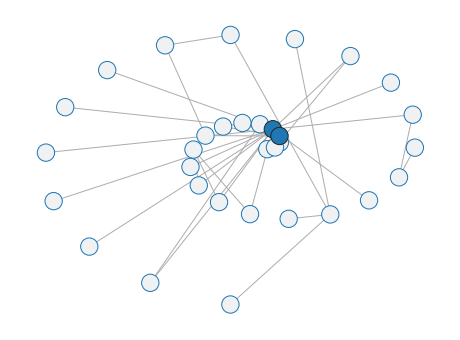

In [58]:
pos = nx.spiral_layout(G,scale = 1)
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G, c, x, ax, pos = pos)

### Multiple core-periphery pairs

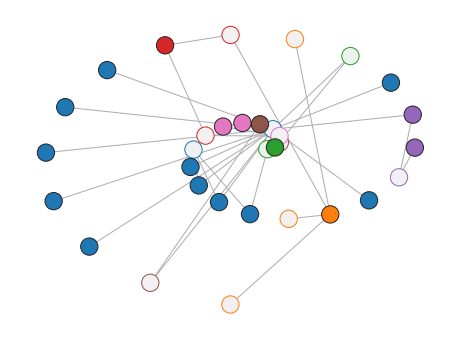

In [59]:
kmconfig = cpnet.KM_config()
kmconfig.detect(G)

c = kmconfig.get_pair_id()
x = kmconfig.get_coreness()

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, _ = cpnet.draw(G, c, x, ax, pos=pos)

### Construct significance test for continuous structure

/usr/local/lib/python3.7/dist-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
100%|██████████| 100/100 [00:01<00:00, 62.56it/s]


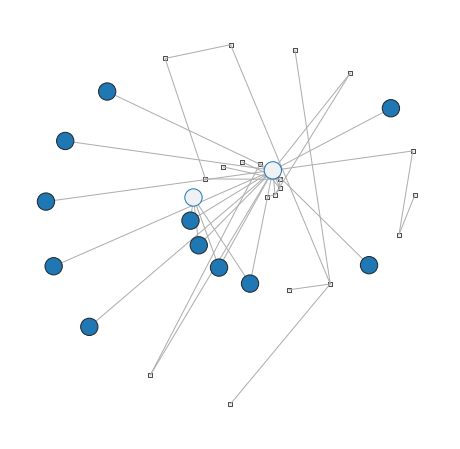

In [60]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.01, num_of_thread=1)

# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)

### Continuous core-periphery structure

In [61]:
edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][63]] #64 was 90. Change later
G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of mean&std of coreness (continuous structure)
alg = cpnet.MINRES()
alg.detect(G)
c = alg.get_pair_id()
x = alg.get_coreness()  # Get the coreness of nodes
    
#coreness = pd.DataFrame.from_dict(x, orient='index', columns=['Coreness'])
#corenessmean = coreness['Coreness'].mean()
#corenessstd = coreness['Coreness'].std()
#print ('mean', corenessmean)
#print ('std', corenessstd)

sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, alg, significance_level=0.05, num_of_rand_net=100, num_of_thread=20)

/usr/local/lib/python3.7/dist-packages/cpnet/qstest.py:94: UserWarning: 'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.
  warnings.warn("'num_of_thread keyword' is duplicated due to a compatibility issue with numba. Only one CPU will be used.")
100%|██████████| 100/100 [00:03<00:00, 25.76it/s]


In [62]:
print(significant)
print(p_values)
print(sig_c)
print(sig_x)

[False]
[0.21999147935065178]
{'0x0000000000d9455cc7eb92d06e00582a982f68fe': None, '0xe96c108da71dbdb2aa1056bc55c3a073061a2fa1': None, '0x1111111254fb6c44bac0bed2854e76f90643097d': None, '0x27182842e098f60e3d576794a5bffb0777e025d3': None, '0xb003df4b243f938132e8cadbeb237abc5a889fb4': None, '0xba12222222228d8ba445958a75a0704d566bf2c8': None, '0x2ef780f110ce76533fbda2d14f794efd7c1481a3': None, '0x370a5275f69cb3c2e76cfe575cf7f846f906b34d': None, '0xbe18f84532d8f7fb6d7919401c0096f3e257db8b': None, '0x30741289523c2e4d2a62c7d6722686d14e723851': None, '0x589be9ccb62e7148413e3df4f3d6a1ce6954cf17': None, '0xaa1b7e233cea131e2eaaf369cb09dafc1445cbf3': None, '0xbf5ae133b9a0fc1a07952a7df2afa21f7f69ef58': None, '0xf6890e3114ebc79f56f49d0072b3aa0af85af949': None, '0x462e8514960e26a539cfe2e40034911662c7033c': None, '0xd524e29e3baf5bb085403ca5665301e94387a7e2': None, '0x5d51d35e63bc2286d991e68e0d135d3babe9c01a': None, '0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88': None, '0xcc7eae6bf5a0d5aa49e1af66df971b

In [63]:
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

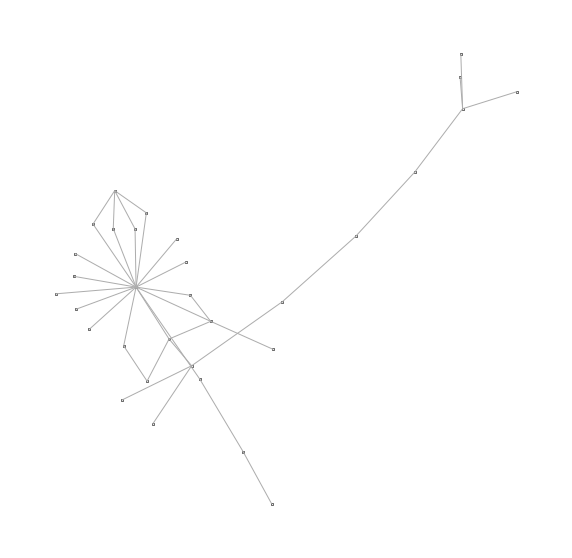

In [64]:
pos = nx.spiral_layout(G,scale = 1)
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
draw_nodes_kwd = {"node_size": 80, "linewidths": 0.8}
ax, pos = cpnet.utils.draw(G, sig_c, sig_x, ax, draw_nodes_kwd=draw_nodes_kwd) 

##Creation of Tablature for Centralization

### Conform core addresses by date counts

The next cell takes about 3 minutes to run.

In [65]:
core_address = []
a = 0
for i in range(0,len(edf_time_partition)):
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    alg = cpnet.BE()
    alg.detect(G)
    c = alg.get_pair_id()
    x = alg.get_coreness()

    coredf = pd.DataFrame.from_dict(x, orient='index',columns=['coreness'])
    core = coredf[coredf['coreness']==1].index.tolist()
    core_address.extend(core)
    a+=1
    #print(a)

In [66]:
cores = pd.DataFrame(core_address)
core_cnt = cores[0].value_counts(ascending=False).reset_index()
core_cnt

,index,0
0,0xb003df4b243f938132e8cadbeb237abc5a889fb4,61
1,0xd524e29e3baf5bb085403ca5665301e94387a7e2,40
2,0x74de5d4fcbf63e00296fd95d33236b9794016631,18
3,0x27182842e098f60e3d576794a5bffb0777e025d3,12
4,0xc697bb6625d9f7adcf0fbf0cbd4dcf50d8716cd3,11
5,0x30741289523c2e4d2a62c7d6722686d14e723851,7
6,0xe93381fb4c4f14bda253907b18fad305d799241a,6
7,0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88,3
8,0xa35d9662c7ba53d5f0ea0f0c9b5706c57aa7639b,3
9,0xf2f400c138f9fb900576263af0bc7fcde2b1b8a8,3


In [67]:
core_cnt.to_csv('core_date_cnt.csv')

### Number of core members each day

The next cell takes about 3 minutes to run.

In [ ]:
core_cnt = []
for i in range(0,len(edf_time_partition)):
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][i]]
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    alg = cpnet.BE()
    alg.detect(G)
    c = alg.get_pair_id()
    x = alg.get_coreness()

    coredf = pd.DataFrame.from_dict(x, orient='index',columns=['coreness'])
    core = coredf[coredf['coreness']==1].index.tolist()
    cnt = len(core)
    core_cnt.append(cnt)

### Average number of neighbors of cores

In [ ]:
avg_core_neighbor = []

for i in range(0,len(edf_time_partition)):
    edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][0]]
    G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
    alg = cpnet.BE()
    alg.detect(G)
    c = alg.get_pair_id()
    x = alg.get_coreness()

    coredf = pd.DataFrame.from_dict(x, orient='index',columns=['coreness'])
    core = coredf[coredf['coreness']==1].index.tolist()

    neighbor_cnt = []
    for i in range (0,len(core)):
        neighbor = G.degree(core[i])
        neighbor_cnt.append(neighbor)
    
    neighbor_cnt_mean = mean(neighbor_cnt)
    avg_core_neighbor.append(neighbor_cnt_mean)

### Update and save features

In [ ]:
Network_Features = pd.read_csv('Euler_Network_Features.csv')
Network_Features['core_cnt']=core_cnt
Network_Features['core_ratio']=Network_Features['core_cnt']/Network_Features['num_nodes']
Network_Features['avg_core_neighbor']=avg_core_neighbor

In [ ]:
Network_Features.to_csv('Euler_Network_Features.csv')

### Possible Removal Of these

In [ ]:
firstmonth  = edf_time_partition.iloc[31:62]
secondmonth = edf_time_partition.iloc[62:94]
secondmonth = secondmonth.reset_index()

df_1month = edf[edf['timestamp'].isin(firstmonth['timestamp'])]
df_2month = edf[edf['timestamp'].isin(secondmonth['timestamp'])]

sender_mdegree= df_1month.groupby(['from_address'])['to_address'].count().reset_index()
receiver_mdegree = df_1month.groupby(['to_address'])['from_address'].count().reset_index()
sender_mdegree = sender_mdegree.rename(columns={'to_address':'degree'})
sender_mdegree = sender_mdegree.rename(columns={'from_address':'address'})
receiver_mdegree = receiver_mdegree.rename(columns = {'from_address':'degree'})
receiver_mdegree = receiver_mdegree.rename(columns = {'to_address':'address'})

merge = pd.merge(sender_mdegree,receiver_mdegree,on="address",how = "outer")
merge = merge.fillna(int(0))
merge['degree'] = merge['degree_x']+merge['degree_y']

In [ ]:
df_sender_txval_tot = df_1month.groupby(['from_address'])['value'].sum().reset_index()
df_receiver_txval_tot = df_1month.groupby(['to_address'])['value'].sum().reset_index()
df_sender_txval_tot = df_sender_txval_tot.rename(columns={'from_address':'address'})
df_receiver_txval_tot = df_receiver_txval_tot.rename(columns={'to_address':'address'})

merge_tx = pd.merge(df_sender_txval_tot,df_receiver_txval_tot,on="address",how = "outer")
merge_tx = merge_tx.fillna(int(0))
merge_tx['value'] = merge_tx['value_x']+merge_tx['value_y']

In [ ]:
top5perct_rdegree = merge['degree'].quantile(0.95)
top5_address_degree = merge[merge['degree']>=top5perct_rdegree]
top5perct_tx = merge_tx['value'].quantile(0.95)
top5_address_tx = merge_tx[merge_tx['value']>=top5perct_tx]

top5_address = pd.merge(top5_address_degree,top5_address_tx,how='inner',on="address")

In [ ]:
sender_remove = df_2month[~df_2month['from_address'].isin(top5_address['address'])]
allremove = sender_remove[~sender_remove['to_address'].isin(top5_address['address'])]

In [ ]:
address_remove = merge.sample(n=int(0.05*len(merge)), replace=False, axis=0)
sen_ar = df_2month[~df_2month['from_address'].isin(address_remove['address'])]
senrec_ar= sen_ar[~sen_ar['to_address'].isin(address_remove['address'])]
senrec_ar = senrec_ar.reset_index()

In [ ]:
edf_1 = edf.loc[edf['timestamp']==edf_time_partition['timestamp'][2]]
G = nx.from_pandas_edgelist(edf_1, 'from_address', 'to_address', 'value', nx.Graph())
alg = cpnet.BE()
alg.detect(G)
c = alg.get_pair_id()
x = alg.get_coreness()

coredf = pd.DataFrame.from_dict(x, orient='index',columns=['coreness'])
core = coredf[coredf['coreness']==1].index.tolist()
core

sen_periphery =  df_2month[~df_2month['from_address'].isin(core)]
senrec_periphery= sen_periphery[~sen_periphery['to_address'].isin(core)]
senrec_periphery = senrec_periphery.reset_index()
#senrec_periphery

## Network Dynamics

In [ ]:
edf_2 = pd.read_csv('Euler_Network_Features.csv')
edf_2.head()

In [ ]:
fig,axes = plt.subplots(3,2)
plt.style.use('default')
#plt.style.use('seaborn-pastel')
ax = edf_2[['Components_cnt']].plot(ax = axes[0,0], figsize=(13,10), grid=False, title='Number of components',xlabel=' ')
ax.set_yscale('log')
edf_2[['giant_com_ratio']].plot(ax = axes[0,1], figsize=(13,7), grid=False, title='Giant component size ratio',xlabel=' ')
edf_2[['modularity']].plot(ax = axes[1,0], figsize=(13,7), grid=False, title='Modularity',xlabel=' ')
#edf_2[['relative_degree']].plot(ax = axes[1,0], figsize=(13,10), grid=False, title='Relative degree',xlabel=' ')
edf_2[['DCstd']].plot(ax = axes[1,1], figsize=(13,7), grid=False, title='Std of Degree Centrality',xlabel=' ')
#edf_2[['cp_test_pvalue']].plot(ax = axes[2,0], figsize=(13,11), grid=False, title='p-value of cp test',xlabel=' ')
#edf_2[['core_cnt']].plot(ax = axes[2,1], figsize=(13,11), grid=False, title='number of cores',xlabel=' ')
edf_2[['Top10 Degree mean ratio']].plot(ax = axes[2,0], figsize=(13,10), grid=False, title='Top10 nodes avg degree / general avg degree',xlabel=' ')
#edf_2[['giant_com_ratio']].plot(ax = axes[2,1], figsize=(13,10), grid=False, title='Giant component size ratio',xlabel=' ')

plt.subplots_adjust(wspace =0.15, hspace =0.35)

#### Breakdown

**Number of Components**: We expect a *smaller* number of componenets to indicate a more *centralized* network. The number of components is fairly random with an exception toward the beginning of the recorded data.

**Giant Component Size Ratio**: A *larger* giant component size ratio indicates a more *centralized* network. In our data, the giant component ratio starts high (suggesting more centralization early on), then becomes random, similar to the number of components.

**Modulatiry**: A *smaller* modularity score suggests a more *centralized* network. Modularity for the Ether token starts low, but quickly rises, and stays fairly stable past day 15. This indicates a more centralized network in early days that becomes decentralized and stays decentralized after a couple of weeks. However, while the modularity for Euler settles around 0.6, the modularity for the AAVE token (found in the original paper) settles around 0.8 before dropping down to 0.7, a possible indication that AAVE is more decentralized than Euler.

**Standard Deviation of Degree Centrality**: A *higher* standard deviation suggests a more *centralized* network. Standard deviation for Euler starts high but quickly falls by day five, where is stays steady. Like the modularity scores, this suggests a more centralized network early on that quickly becomes and stays decentralized.

#**Dydx Token**

In [ ]:
url = 'https://raw.githubusercontent.com/nghthompson/Math_Clinic_Project/main/dYdX.csv'
df = pd.read_csv(url)

Estimated run time for code chuck below
4:22 - 4:28 <br>
Rum time too long, haulted, RAM too much

In [ ]:
#unique_addresses = set(df['from_address'].unique()) | set(df['to_address'].unique())
#mapping = {address: n for n, address in enumerate(unique_addresses)}

#df[['from_ID', 'to_ID']] = df[['from_address', 'to_address']].replace(mapping)
#G1 = nx.from_pandas_edgelist(df, source='from_ID', target='to_ID', edge_attr='value')

The below code will not run without the above, and since that won't run due to RAM, the bigger graph won't run.

In [ ]:
#fig, ax = plt.subplots(figsize=(100, 100))
#nx.draw(G1, with_labels=False, node_size=100)

##Sorting, Defining core-periphery structure, Graphs

In [ ]:
df.sort_values('block_timestamp', ascending = True)
df.tail()

In [ ]:
# data cleaning
df.rename(columns={'f0_':'value'}, inplace = True)
df = df.dropna()
df['value'] = df['value'].apply(lambda x: float(x))
df['timestamp'] = pd.to_datetime(df['block_timestamp'])
df['timestamp'] = df['timestamp'].apply(lambda x: str(x)[:10])
df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df[df['timestamp']>'2021-07-12']
df = df[df['timestamp']<'2022-08-24']


In [ ]:
df.to_csv('dydx Raw Transfer Data.csv')

Following code takes about 1 minute

In [ ]:
## add values between the 2 same addresses together
df[['from_address', 'to_address']] = np.sort(df[['from_address', 'to_address']], axis=1)
df= df.groupby(['timestamp','from_address','to_address']).agg(lambda x: sum(x)).reset_index()

In [ ]:
df.to_csv('dydx transaction data_after preprocessing.csv')

In [ ]:
df = pd.read_csv('dydx transaction data_after preprocessing.csv')

### Network Analysis

In [ ]:
df_time_partition = df.groupby(['timestamp'])['to_address'].agg(['nunique']).reset_index()
df_time_partition = df_time_partition.drop(['nunique'], axis=1)

###Number of daily edges

In [ ]:
num_nodes = []
num_edges = []
for i in range(0,len(df_time_partition)):
    
    # Data Partition
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Number of nodes, number of edges
    nodes = G.number_of_nodes()
    edges = G.number_of_edges()
    num_nodes.append(nodes)
    num_edges.append(edges)

In [ ]:
Network_Features={"num_nodes" : num_nodes,"num_edges" : num_edges}
Network_Features=pd.DataFrame(Network_Features)
Network_Features['time'] =  df_time_partition['timestamp']

### Degree Setting

In [ ]:
Degreemean = []
Degreestd = []
for i in range(0,len(df_time_partition)):
    
    # Data Partition
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    #edf_1 = actsenrec.loc[actsenrec['timestamp']==edf_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Degree_centrality, mean_value
    degrees = G.degree()
    degree = list(dict(G.degree()).values())
    edf_deg = {"Degree" : degree}
    edf_deg = pd.DataFrame(edf_deg)
    DC_mean = edf_deg['Degree'].mean()
    DC_std = edf_deg['Degree'].std()
    Degreemean.append(DC_mean)
    Degreestd.append(DC_std)

In [ ]:
Network_Features['Degree mean']  = Degreemean
Network_Features['Degree std']  = Degreestd

### Extract Top 10 by ratio

In [ ]:
top10Degreemean = []
top10Degreestd = []

for i in range(0,len(df_time_partition)):

    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    sender_mdegree= df_1.groupby(['from_address'])['to_address'].count().reset_index()
    receiver_mdegree = df_1.groupby(['to_address'])['from_address'].count().reset_index()
    sender_mdegree = sender_mdegree.rename(columns={'to_address':'degree'})
    sender_mdegree = sender_mdegree.rename(columns={'from_address':'address'})
    receiver_mdegree = receiver_mdegree.rename(columns = {'from_address':'degree'})
    receiver_mdegree = receiver_mdegree.rename(columns = {'to_address':'address'})

    merge = pd.merge(sender_mdegree,receiver_mdegree,on="address",how = "outer")
    merge = merge.fillna(int(0))
    merge['degree'] = merge['degree_x']+merge['degree_y']

    merge.sort_values(by=['degree'], ascending=False, inplace=True)
    merge = merge.reset_index()
    top5degree = merge['address'][0:10].tolist()

    sen_top =  df_1[df_1['from_address'].isin(top5degree)]
    rec_top= df_1[df_1['to_address'].isin(top5degree)]

    topaddress = pd.concat([sen_top,rec_top]).drop_duplicates()

    G = nx.from_pandas_edgelist(topaddress, 'from_address', 'to_address', 'value', nx.Graph())
    # Calculation of absolute degree
    degree = []
    for j in range (0,1): ## MUST CHANGE BACK TO (0,10) LATER. FIND OUT WHY top5degree IS ONLY THREE VARIABLES
        degrees = G.degree(top5degree[j])
        degree.append(degrees)
    df_deg = {"Degree" : degree}
    df_deg = pd.DataFrame(df_deg)
    deg_mean = df_deg['Degree'].mean()
    deg_std = df_deg['Degree'].std()
    top10Degreemean.append(deg_mean)
    top10Degreestd.append(deg_std)

In [ ]:
Network_Features['Top10Degree mean']  = top10Degreemean
Network_Features['Top10Degree std']  = top10Degreestd

In [ ]:
Network_Features['Top10 Degree mean ratio']  = Network_Features['Top10Degree mean']/Network_Features['Degree mean']

### Degree centrality

In [ ]:
DCmean = []
DCstd = []
for i in range(0,len(df_time_partition)):
    
    # Data Partition
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    #df_1 = actsenrec.loc[actsenrec['timestamp']==edf_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Degree_centrality, mean_value
    deg_cen = nx.degree_centrality(G)
    edf_deg = pd.DataFrame.from_dict(deg_cen, orient='index', columns=['Degree_Centrality'])
    DC_mean = edf_deg['Degree_Centrality'].mean()
    DC_std = edf_deg['Degree_Centrality'].std()
    DCmean.append(DC_mean)
    DCstd.append(DC_std)

### Coefficient Clusters

In [ ]:
clustermean = []
clusterstd = []
for i in range(0,len(df_time_partition)):
    
    # Data Partition
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    #df_1 = actsenrec.loc[actsenrec['timestamp']==df_time_partition['timestamp'][i]]
    
    # Unweighted-Directed Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Clustering_Coefficient, mean_value, std
    clustering = nx.clustering(G)
    df_cluster = pd.DataFrame.from_dict(clustering, orient='index', columns=['Clustering_Coefficient'])
    cluster_mean = df_cluster['Clustering_Coefficient'].mean()
    cluster_std = df_cluster['Clustering_Coefficient'].std()
    clustermean.append(cluster_mean)
    clusterstd.append(cluster_std)

### Build Modularity

In [ ]:
mod_list = []
for i in range(0,len(df_time_partition)):
    
    # Data Partition
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    #df_1 = actsenrec.loc[actsenrec['timestamp']==df_time_partition['timestamp'][i]]
    
    # unweighted-undirected Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of modularity
    part = community.best_partition(G)
    mod = community.modularity(part,G)
    mod_list.append(mod)

### Build Transitivity

In [ ]:
tran_list = []
for i in range(0,len(df_time_partition)):
    
    # Data Partition
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    #df_1 = actsenrec.loc[actsenrec['timestamp']==df_time_partition['timestamp'][i]]
    
    # Unweighted-undirected Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of transitivity, 
    tran = nx.transitivity(G)
    tran_list.append(tran)

### Centrality by Eigenvector

Take 1 minute to run

In [ ]:
eigmean = []
eigstd = []
for i in range(0,len(df_time_partition)):
    
    # Data Partition
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    #df_1 = actsenrec.loc[actsenrec['timestamp']==df_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Closeness_centrality, mean_value
    eig_cen = nx.eigenvector_centrality(G, max_iter=20000)
    df_eig = pd.DataFrame.from_dict(eig_cen, orient='index', columns=['eigenvector_centrality'])
    eig_mean = df_eig['eigenvector_centrality'].mean()
    eig_std = df_eig['eigenvector_centrality'].std()
    eigmean.append(eig_mean)
    eigstd.append(eig_std)

### Closeness Centrality

Takes 17 minutes to run

In [ ]:
CCmean = []
CCstd = []
for i in range(0,len(df_time_partition)):
    
    # Data Partition
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    
    # MultiDi Network Building (weighted-directed graph)
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of Closeness_centrality, mean_value
    close_cen = nx.closeness_centrality(G)
    edf_close = pd.DataFrame.from_dict(close_cen, orient='index', columns=['Closeness_Centrality'])
    CC_mean = edf_close['Closeness_Centrality'].mean()
    CC_std = edf_close['Closeness_Centrality'].std()
    CCmean.append(CC_mean)
    CCstd.append(CC_std)

### Number of components

In [ ]:
components_cnt = []
for i in range(0,len(df_time_partition)):
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    com_cnt = nx.number_connected_components(G)
    components_cnt.append(com_cnt)

### Gaint component by size and number of nodes 

In [ ]:
giant_com_ratio = []
for i in range(0,len(df_time_partition)):
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
# G = nx.Graph()
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
#com_cnt = nx.number_connected_components(G)
#components_cnt.append(com_cnt)
    nodes = G0.number_of_nodes()
    nodes_whole = G.number_of_nodes()
    ratio = nodes/nodes_whole
    giant_com_ratio.append(ratio)

### Save features output

In [ ]:
Network_Features['DCmean']=DCmean
Network_Features['DCstd']=DCstd
Network_Features['clustermean']=clustermean
Network_Features['clusterstd']=clusterstd
Network_Features['modularity']=mod_list
Network_Features['transitivity']=tran_list
Network_Features['eig_mean']=eigmean
Network_Features['eig_std']=eigstd
Network_Features['closenessmean']=CCmean
Network_Features['closenessstd']=CCstd
Network_Features['Components_cnt']=components_cnt
Network_Features['giant_com_ratio']=giant_com_ratio

Network_Features['token'] =  'dydx'
Network_Features.head()

In [ ]:
Network_Features.to_csv('dydx_Network_Features.csv')

Takes about a minute to run

## Form Graph

### Construct significance test

In [ ]:
df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][357]] #64 was 135. change later
G_2 = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    

alg = cpnet.BE()
alg.detect(G_2)
c = alg.get_pair_id()
x = alg.get_coreness()  # Get the coreness of nodes

##coreness = pd.DataFrame.from_dict(x, orient='index', columns=['Coreness'])
##corenessmean = coreness['Coreness'].mean()
#corenessmean

sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G_2, alg, significance_level=0.05, num_of_rand_net=100, num_of_thread=16)

In [ ]:
print(significant)
print(p_values)

In [ ]:
pos = nx.spiral_layout(G_2,scale = 1)
fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, pos = cpnet.draw(G_2, c, x, ax, pos = pos)

### Multiple core-periphery pairs

In [ ]:
kmconfig = cpnet.KM_config()
kmconfig.detect(G_2)

c = kmconfig.get_pair_id()
x = kmconfig.get_coreness()

fig = plt.figure(figsize=(8, 6))
ax = plt.gca() 
ax, _ = cpnet.draw(G_2, c, x, ax, pos=pos)

### Construct significance test for continuous structure

In [ ]:
sig_c, sig_x, significant, p_values = cpnet.qstest(
    c, x, G, kmconfig, significance_level=0.01, num_of_thread=1)

# Visualization
fig = plt.figure(figsize=(8, 8))
ax = plt.gca()
ax, pos = cpnet.draw(G, sig_c, sig_x, ax, pos=pos)

### Continuous core-periphery structure

In [ ]:
df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][357]] #64 was 90. Change later
G_2 = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    
    # Calculation of mean&std of coreness (continuous structure)
alg = cpnet.MINRES()
alg.detect(G_2)
x = alg.get_coreness() 
    
#coreness = pd.DataFrame.from_dict(x, orient='index', columns=['Coreness'])
#corenessmean = coreness['Coreness'].mean()
#corenessstd = coreness['Coreness'].std()
#print ('mean', corenessmean)
#print ('std', corenessstd)

#sig_c, sig_x, significant, p_values = cpnet.qstest(
    #c, x, G_2, alg, significance_level=0.05, num_of_rand_net=100, num_of_thread=16)

In [ ]:
print(significant)
print(p_values)
print(sig_c)
print(sig_x)

In [ ]:
x = alg.get_coreness()  # Get the coreness of nodes
c = alg.get_pair_id()  # Get the group membership of nodes

In [ ]:
# Visualization
pos = nx.spiral_layout(G_2,scale = 1)
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
draw_nodes_kwd = {"node_size": 80, "linewidths": 0.8}
ax, pos = cpnet.draw(G_2, sig_c, sig_x, ax, draw_nodes_kwd=draw_nodes_kwd)

### Multiple core-periphery pairs

In [ ]:
kmconfig = cpnet.KM_config()
kmconfig.detect(G_2)

c = kmconfig.get_pair_id()
x = kmconfig.get_coreness()

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()
ax, _ = cpnet.draw(G_2, c, x, ax, pos=pos)

##Creation of Tablature for Centralization

### Conform core addresses by date counts

Below code took 24 minutes to run

In [ ]:
core_address = []
a = 0
for i in range(0,len(df_time_partition)):
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    alg = cpnet.BE()
    alg.detect(G)
    c = alg.get_pair_id()
    x = alg.get_coreness()

    coredf = pd.DataFrame.from_dict(x, orient='index',columns=['coreness'])
    core = coredf[coredf['coreness']==1].index.tolist()
    core_address.extend(core)
    a+=1
    #print(a)

In [ ]:
cores = pd.DataFrame(core_address)
core_cnt = cores[0].value_counts(ascending=False).reset_index()
#core_cnt

In [ ]:
core_cnt.to_csv('dydx_core_date_cnt.csv')

### Number of core members each day

In [ ]:
core_cnt = []
for i in range(0,len(df_time_partition)):
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][i]]
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    alg = cpnet.BE()
    alg.detect(G)
    c = alg.get_pair_id()
    x = alg.get_coreness()

    coredf = pd.DataFrame.from_dict(x, orient='index',columns=['coreness'])
    core = coredf[coredf['coreness']==1].index.tolist()
    cnt = len(core)
    core_cnt.append(cnt)

### Average number of neighbors of cores

In [ ]:
avg_core_neighbor = []

for i in range(0,len(df_time_partition)):
    df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][0]]
    G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
    alg = cpnet.BE()
    alg.detect(G)
    c = alg.get_pair_id()
    x = alg.get_coreness()

    coredf = pd.DataFrame.from_dict(x, orient='index',columns=['coreness'])
    core = coredf[coredf['coreness']==1].index.tolist()

    neighbor_cnt = []
    for i in range (0,len(core)):
        neighbor = G.degree(core[i])
        neighbor_cnt.append(neighbor)
    
    neighbor_cnt_mean = mean(neighbor_cnt)
    avg_core_neighbor.append(neighbor_cnt_mean)

### Update and save features

In [ ]:
Network_Features = pd.read_csv('dydx_Network_Features.csv')
Network_Features['core_cnt']=core_cnt
Network_Features['core_ratio']=Network_Features['core_cnt']/Network_Features['num_nodes']
Network_Features['avg_core_neighbor']=avg_core_neighbor

In [ ]:
Network_Features.to_csv('dydx_Network_Features.csv')

### Possible Removal

In [ ]:
firstmonth  = df_time_partition.iloc[31:62]
secondmonth = df_time_partition.iloc[62:94]
secondmonth = secondmonth.reset_index()

df_1month = df[df['timestamp'].isin(firstmonth['timestamp'])]
df_2month = df[df['timestamp'].isin(secondmonth['timestamp'])]

sender_mdegree= df_1month.groupby(['from_address'])['to_address'].count().reset_index()
receiver_mdegree = df_1month.groupby(['to_address'])['from_address'].count().reset_index()
sender_mdegree = sender_mdegree.rename(columns={'to_address':'degree'})
sender_mdegree = sender_mdegree.rename(columns={'from_address':'address'})
receiver_mdegree = receiver_mdegree.rename(columns = {'from_address':'degree'})
receiver_mdegree = receiver_mdegree.rename(columns = {'to_address':'address'})

merge = pd.merge(sender_mdegree,receiver_mdegree,on="address",how = "outer")
merge = merge.fillna(int(0))
merge['degree'] = merge['degree_x']+merge['degree_y']

In [ ]:
df_sender_txval_tot = df_1month.groupby(['from_address'])['value'].sum().reset_index()
df_receiver_txval_tot = df_1month.groupby(['to_address'])['value'].sum().reset_index()
df_sender_txval_tot = df_sender_txval_tot.rename(columns={'from_address':'address'})
df_receiver_txval_tot = df_receiver_txval_tot.rename(columns={'to_address':'address'})

merge_tx = pd.merge(df_sender_txval_tot,df_receiver_txval_tot,on="address",how = "outer")
merge_tx = merge_tx.fillna(int(0))
merge_tx['value'] = merge_tx['value_x']+merge_tx['value_y']

In [ ]:
top5perct_rdegree = merge['degree'].quantile(0.95)
top5_address_degree = merge[merge['degree']>=top5perct_rdegree]
top5perct_tx = merge_tx['value'].quantile(0.95)
top5_address_tx = merge_tx[merge_tx['value']>=top5perct_tx]

top5_address = pd.merge(top5_address_degree,top5_address_tx,how='inner',on="address")

In [ ]:
sender_remove = df_2month[~df_2month['from_address'].isin(top5_address['address'])]
allremove = sender_remove[~sender_remove['to_address'].isin(top5_address['address'])]

In [ ]:
address_remove = merge.sample(n=int(0.05*len(merge)), replace=False, axis=0)
sen_ar = df_2month[~df_2month['from_address'].isin(address_remove['address'])]
senrec_ar= sen_ar[~sen_ar['to_address'].isin(address_remove['address'])]
senrec_ar = senrec_ar.reset_index()

In [ ]:
df_1 = df.loc[df['timestamp']==df_time_partition['timestamp'][2]]
G = nx.from_pandas_edgelist(df_1, 'from_address', 'to_address', 'value', nx.Graph())
alg = cpnet.BE()
alg.detect(G)
c = alg.get_pair_id()
x = alg.get_coreness()

coredf = pd.DataFrame.from_dict(x, orient='index',columns=['coreness'])
core = coredf[coredf['coreness']==1].index.tolist()
core

sen_periphery =  df_2month[~df_2month['from_address'].isin(core)]
senrec_periphery= sen_periphery[~sen_periphery['to_address'].isin(core)]
senrec_periphery = senrec_periphery.reset_index()
#senrec_periphery

### Network Dynamics

In [ ]:
dydxdf_1 = pd.read_csv('dydx_Network_Features.csv')
dydxdf_1.head()

In [ ]:
fig,axes = plt.subplots(3,2)
plt.style.use('default')
#plt.style.use('seaborn-pastel')
ax = dydxdf_1[['Components_cnt']].plot(ax = axes[0,0], figsize=(13,10), grid=False, title='Number of components',xlabel=' ')
ax.set_yscale('log')
dydxdf_1[['giant_com_ratio']].plot(ax = axes[0,1], figsize=(13,7), grid=False, title='Giant component size ratio',xlabel=' ')
dydxdf_1[['modularity']].plot(ax = axes[1,0], figsize=(13,7), grid=False, title='Modularity',xlabel=' ')
#dydxdf_1[['relative_degree']].plot(ax = axes[1,0], figsize=(13,10), grid=False, title='Relative degree',xlabel=' ')
dydxdf_1[['DCstd']].plot(ax = axes[1,1], figsize=(13,7), grid=False, title='Std of Degree Centrality',xlabel=' ')
#dydxdf_1[['cp_test_pvalue']].plot(ax = axes[2,0], figsize=(13,11), grid=False, title='p-value of cp test',xlabel=' ')
#dydxdf_1[['core_cnt']].plot(ax = axes[2,1], figsize=(13,11), grid=False, title='number of cores',xlabel=' ')
dydxdf_1[['Top10 Degree mean ratio']].plot(ax = axes[2,0], figsize=(13,10), grid=False, title='Top10 nodes avg degree / general avg degree',xlabel=' ')
#dydxdf_1[['giant_com_ratio']].plot(ax = axes[2,1], figsize=(13,10), grid=False, title='Giant component size ratio',xlabel=' ')

plt.subplots_adjust(wspace =0.15, hspace =0.35)

#### Breakdown

**Number of Components**: We expect a *smaller* number of componenets to indicate a more *centralized* network. Number of components for dYdX starts low before spiking up, then settling in a middleground. It is difficult to make a judgement of decentralization based on this graph alone.

**Giant Component Size Ratio**: A *larger* giant component size ratio indicates a more *centralized* network. Giant component ratio begins very high before dropping down and settling around 0.8 to 0.9. This indicates that the dYdX token started centralized, but become more decentralized after a few days. The trend of this graph (with the exception of a couple of low outliers) is consistent with the result for the AAVE token studied in the original paper. 

**Modulatiry**: A *smaller* modularity score suggests a more *centralized* network. Modularity for dYdX starts very low but quickly shoots up and stablizes around 0.7. In terms of decentraliztion, this matches the trend set by the giant component size ratio in that the token starts centralized but quickly becomes and stays decentralized. Also, modularity settling at 0.7 matches the modularity of the AAVE token, both of which have a slightly higher modularity than the Euler token does. 

**Standard Deviation of Degree Centrality**: A *higher* standard deviation suggests a more *centralized* network. Early on, there are a few days with a high standard deviation before it drops and settles near zero. This indicates that the token started off more centralized, but quickly became decentralized. The numbers are also consistent with those of the AAVE and Euler tokens.

# Citiations

Ao, Ziqiao, Gergely Horvath, and Luyao Zhang. "Are decentralized finance really decentralized? A social network analysis of the Aave protocol on the Ethereum blockchain." arXiv preprint arXiv:2206.08401 (2022). <br>
Kojaku, Sadamori, and Naoki Masuda. "Core-periphery structure requires something else in the network." New Journal of physics 20.4 (2018): 043012. [2] <br>
Kojaku, Sadamori, and Naoki Masuda. "Finding multiple core-periphery pairs in networks." Physical Review E 96.5 (2017): 052313. [3] <br>
Ma, Chuang, et al. "Detection of core-periphery structure in networks by 3-tuple motifs." arXiv preprint arXiv:1705.04062 (2017). [4] <br>


